In [1]:
#importing libraries for the project
import os, types
import pandas as pd
import numpy as np
%matplotlib inline
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import seaborn as sns
import scipy as sp
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Introduction 

**About the Dataset**

The dataset is related to life expectancy. Health factors for 193 countries have been collected from the same WHO data repository website and the corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. The dataset consists of 22 Columns and 2938 rows. The predictor variables are divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors.


**Response variable: Life Expectancy**


The predictor variables include:

*	Country: Name of the county- (Categorical)
*	Year: Year the information was retrieved (Quantitative)
*	Status: Developing or developed status (Categorical)
*	Life Expectancy: Life Expectancy in Age (Quantitative)
*	Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) (Quantitative)
*	Infant Deaths: Number of Infant Deaths per 1000 population (Quantitative)	
*	Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) (Quantitative)
*	Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%) (Quantitive)
*	Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)- (Quantitative)
*	Measles: Number of reported cases per 1000 population (Quantitative)	 
*	BMI: Average Body Mass Index of entire population (Quantitave)	
*	Under-Five Deaths: Number of under-five deaths per 1000 population (Quantitave)
*	Polio: Polio (Pol3) immunization coverage among 1-year-olds (%) (Quantitave)
*	Total Expenditure:General government expenditure on health as a percentage of total government expenditure (%) (Quantitave)
*	Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) (Quantitave)
*	HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years) (Quantitave)
*	GDP: Gross Domestic Product per capita (in USD)	(Quantitave)
*	Population:	Population of the country (Quantitave)
*	Thinness 1-19 Years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%) (Quantitave)
*	Thinness 5-9 Years:	Prevalence of thinness among children for Age 5 to 9(%) (Quantitave)
*	Income Composition of Resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1) (Quantitave)
*	Schooling: Number of years of Schooling(years) (Quantitave)


**Research Questions**

* What is the impact of Immunization coverage on life expectancy?
* Which predictor has the largest impact on life expectancy?
* How does infant mortality rate impact life expectancy?


# Exploratory Data Analysis

In [2]:
#Importing data set (Knuth)
life=pd.read_csv('life.csv')
print(type(life))
life.head()

<class 'pandas.core.frame.DataFrame'>


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
life.shape

(2938, 22)

There are 22 Columns and 2938 rows. 

In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

There are 20 quantitative variable and 2 categorical variables. 

In [5]:
life.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2928.0  6.922493e+01  9.523867e+00   
Adult Mortality                  2928.0  1.647964e+02  1.242921e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2744.0  4.602861e+00  4.052413e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2385.0  8.094046e+01  2.507002e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2904.0  3.832125e+01  2.004403e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2919.0  8.255019e+01  2.342805e+01   
Total expenditure                2712.0  5.938190e+00  2.498320e+00   
Diphtheria                       2919.0  8.232408e+01  2.371691e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2490.0  7.483158e+03  1.427017e+04   
Population                       2286.0  1.275338e+07  6.101210e+07   
 thinness  1-19 years            2904.0  4.839704e+00  4.420195e+00   
 thinness 5-9 years              2904.0  4.870317e+00  4.508882e+00   
Income composition of resources  2771.0  6.275511e-01  2.109036e-01   
Schooling                        2775.0  1.199279e+01  3.358920e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.100000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       0.877500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      77.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.300000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.260000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     463.935626  1.766948e+03   
Population                         34.00000  195793.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.500000  3.300000e+00   
Income composition of resources     0.00000       0.493000  6.770000e-01   
Schooling                           0.00000      10.100000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.570000e+01  8.900000e+01  
Adult Mortality                  2.280000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.702500e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.700000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.620000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.492500e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

Some predictors have missing values. We will look into this and work on filling in or deleting the missing values at a later stage. 

## Quantitative Features

### Histograms

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Life expectancy '}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles '}>],
       [<AxesSubplot:title={'center':' BMI '}>,
        <AxesSubplot:title={'center':'under-five deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>],
       [<AxesSubplot:title={'center':'Diphtheria '}>,
        <AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':' thinness  1-19 years'}>,
        <AxesSubplot:title={'center':' thinness 5-9 years'}>,
        

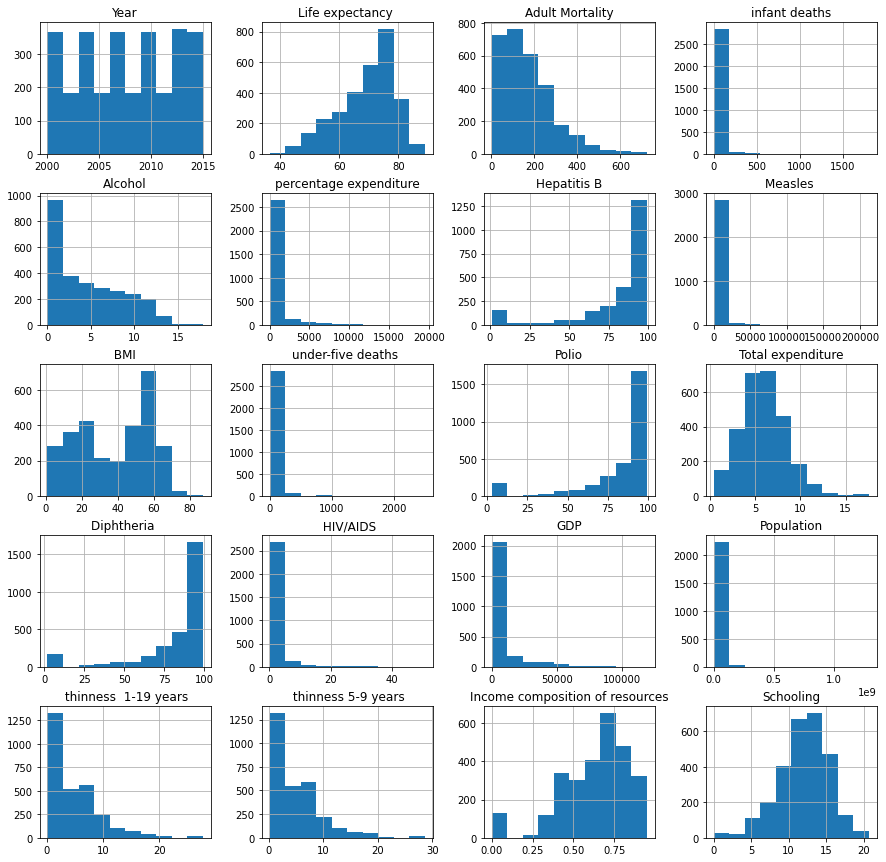

In [6]:
life.hist(figsize=(15,15))

These are the different histograms for all 20 quantitative features. Each of these features will be looked into deeper. 

<Figure size 864x360 with 0 Axes>

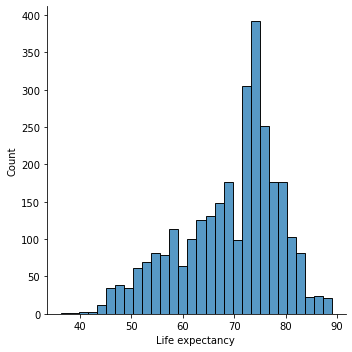

In [7]:
plt.figure(figsize=(12,5))
sns.displot(life['Life expectancy '])
plt.show()

Life expectancy is slightly left-skewed. 

In [8]:
#find the skewness of life expectancy
print(life['Life expectancy '].skew())

-0.6386047358773552


Life expectancy has a sknewness of -0.639. We **will not** transform this variable. 

<Figure size 864x360 with 0 Axes>

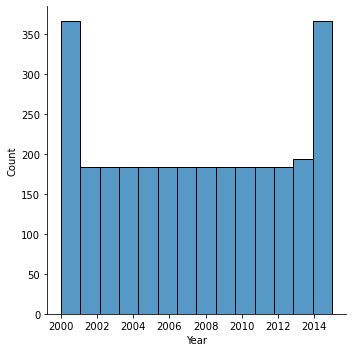

In [9]:
plt.figure(figsize=(12,5))
sns.displot(life['Year'])
plt.show()

Years is uniformly distributed. 

In [10]:
#find the skewness of Year
print(life['Year'].skew())

-0.0064090273593942005


Year has a sknewness of 0.006. We **will not** transform this variable. 

<Figure size 864x360 with 0 Axes>

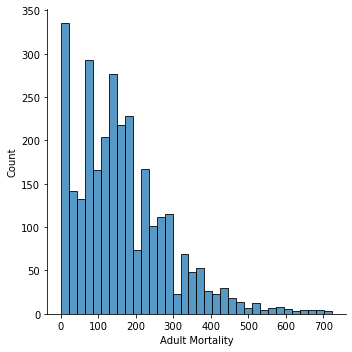

In [11]:
plt.figure(figsize=(12,5))
sns.displot(life['Adult Mortality'])
plt.show()

Adult Mortality is slightly right skewed. 

In [12]:
#find the skewness of adult mortality
print(life['Adult Mortality'].skew())

1.1743694876948636


Adult Mortality has a sknewness of 1.17. We **will** transform this variable. 

<Figure size 864x360 with 0 Axes>

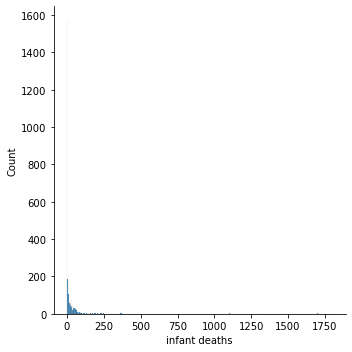

In [13]:
plt.figure(figsize=(12,5))
sns.displot(life['infant deaths'])
plt.show()

Infact deaths is right skewed. 

In [14]:
#find the skewness of Infant Deaths
print(life['infant deaths'].skew())

9.786962950426057


Infant deaths has a skewness of 9.79. We **will** transform this variable. 

<Figure size 864x360 with 0 Axes>

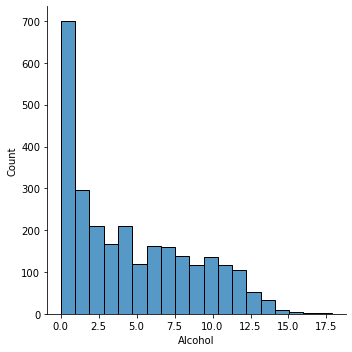

In [15]:
plt.figure(figsize=(12,5))
sns.displot(life['Alcohol'])
plt.show()

Alcohol is slightly right skewed. 

In [16]:
#find the skewness of Alcohol
print(life['Alcohol'].skew())

0.5895625281160799


Alcohol has a skewness of 0.600. The skewness is good but becuase of the right skewness illustrated by the histrogram, we **will** transform this variable. 

<Figure size 864x360 with 0 Axes>

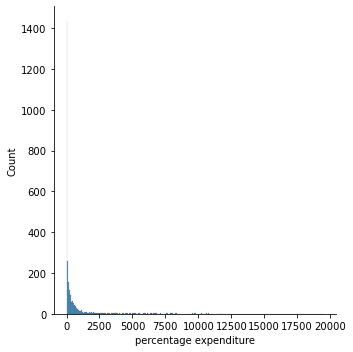

In [17]:
plt.figure(figsize=(12,5))
sns.displot(life['percentage expenditure'])
plt.show()

In [18]:
#find the skewness of percentage expenditure
print(life['percentage expenditure'].skew())

4.6520513478350605


Percentage Expenditure has a skewness of 4.65. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

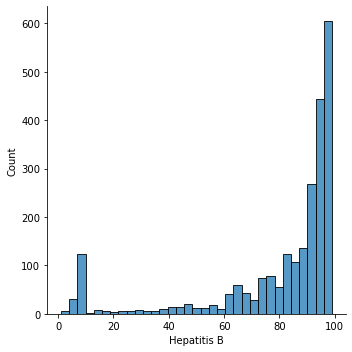

In [19]:
plt.figure(figsize=(12,5))
sns.displot(life['Hepatitis B'])
plt.show()

Hepatitis B is left skewed.

In [20]:
#find the skewness of life expectancy
print(life['Hepatitis B'].skew())

-1.9308451037678318


Hepatitis B has a skewness of -1.93. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

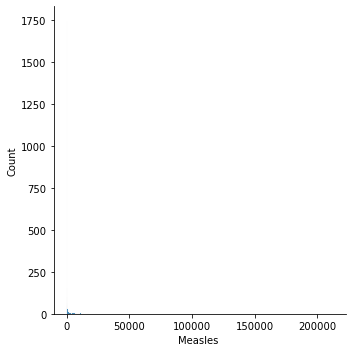

In [21]:
plt.figure(figsize=(12,5))
sns.displot(life['Measles '])
plt.show()

Since the above graph is hard to see, we will include a box plot. 

<function matplotlib.pyplot.show(close=None, block=None)>

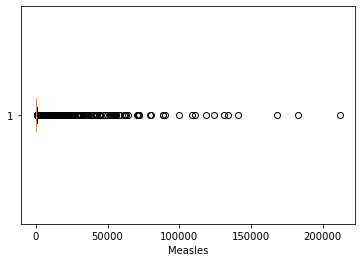

In [22]:
#boxplot of Measles
plt.boxplot(life['Measles '], vert=False)
plt.xlabel ("Measles")
plt.show

Both the box plot and the histogram show a right skewness.

In [23]:
#find the skewness of Measles
print(life['Measles '].skew())

9.441331947061583


Measles has a skewness of 9.44. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

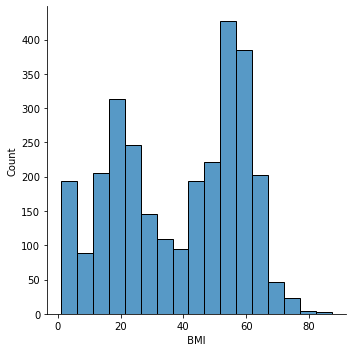

In [24]:
plt.figure(figsize=(12,5))
sns.displot(life[' BMI '])
plt.show()

BMI has good elements of normal distribution 

In [25]:
#find the skewness of BMI
print(life[' BMI '].skew())

-0.219311603419775


BMI has a skewness of -0.22. We **will not** transform this variable.

<Figure size 864x360 with 0 Axes>

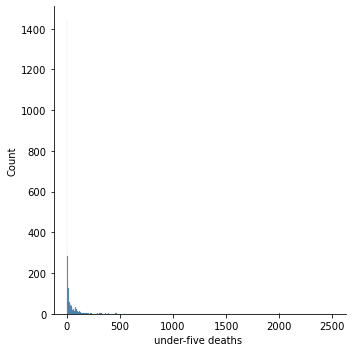

In [26]:
plt.figure(figsize=(12,5))
sns.displot(life['under-five deaths '])
plt.show()

Under-five deaths is right skewed. 

In [27]:
#find the skewness of under-five deaths
print(life['under-five deaths '].skew())

9.495064656961773


Under-five deaths has a skewness of 9.50. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

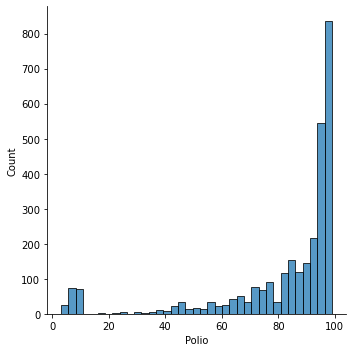

In [28]:
plt.figure(figsize=(12,5))
sns.displot(life['Polio'])
plt.show()

Polio is left skewed. 

In [29]:
#find the skewness of Polio
print(life['Polio'].skew())

-2.0980532489729056


Polio has a skewness of -2.10. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

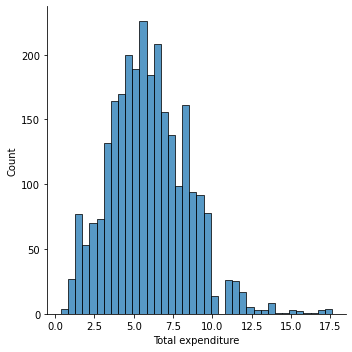

In [30]:
plt.figure(figsize=(12,5))
sns.displot(life['Total expenditure'])
plt.show()

Total expenditure is normally distibuted. 

In [31]:
#find the skewness of Total expenditure
print(life['Total expenditure'].skew())

0.6186855520639749


Total expenditure has a skewness of 0.619. We **will not** transform this variable.

<Figure size 864x360 with 0 Axes>

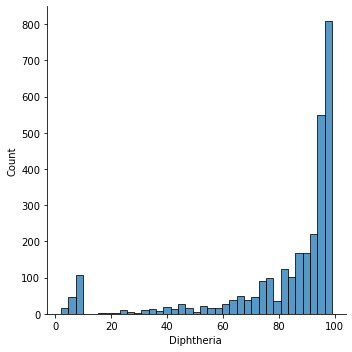

In [32]:
plt.figure(figsize=(12,5))
sns.displot(life['Diphtheria '])
plt.show()

Diphtheria is left skewed. 

In [33]:
#find the skewness of Diphtheria
print(life['Diphtheria '].skew())

-2.0727529292965605


Thinness 5-9 years has a skewness of -2.07. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

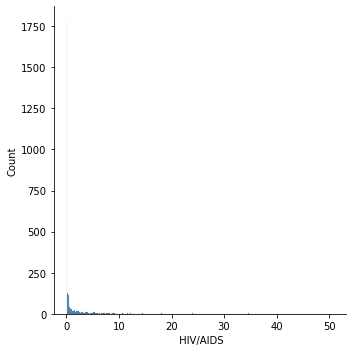

In [34]:
plt.figure(figsize=(12,5))
sns.displot(life[' HIV/AIDS'])
plt.show()

HIV/AIDS is right skewed. 

In [35]:
#find the skewness of HIV/AIDS
print(life[' HIV/AIDS'].skew())

5.396112042126371


HIV/AIDS has a skewness of 5.40.  We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

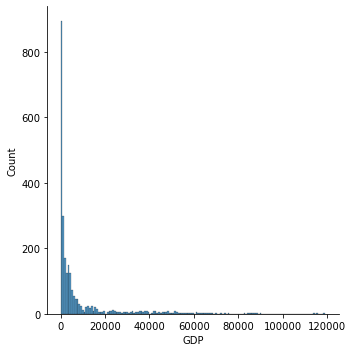

In [36]:
plt.figure(figsize=(12,5))
sns.displot(life['GDP'])
plt.show()

GDP is right skewed. 

In [37]:
#find the skewness of GDP
print(life['GDP'].skew())

3.2066548698696393


GDP has a skewness of 3.21. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

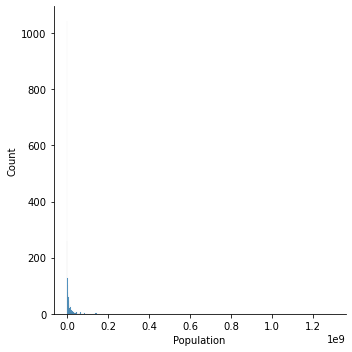

In [38]:
plt.figure(figsize=(12,5))
sns.displot(life['Population'])
plt.show()

Population is very right skewed. 

In [39]:
#find the skewness of population 
print(life['Population'].skew())

15.916235598428203


Population has a skewness of 15.9. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

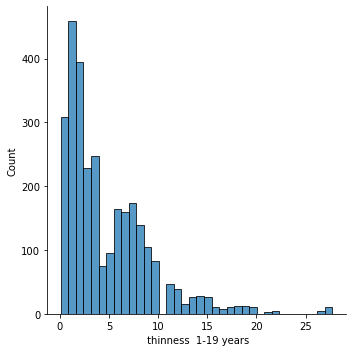

In [40]:
plt.figure(figsize=(12,5))
sns.displot(life[' thinness  1-19 years'])
plt.show()

Thinness 1-19 years is slightly right skewed. 

In [41]:
#find the skewness of thinness 1-19 years
print(life[' thinness  1-19 years'].skew())

1.7114710881233637


Thinness 1-19 years has a skewness of 1.71. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

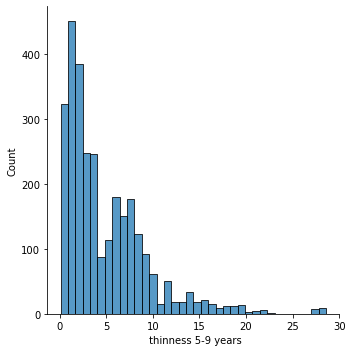

In [42]:
plt.figure(figsize=(12,5))
sns.displot(life[' thinness 5-9 years'])
plt.show()

Thinness 5-9 years is slightly right skewed. 

In [43]:
#find the skewness of Thinness 5-9 years
print(life[' thinness 5-9 years'].skew())

1.777423977376571


Thinness 5-9 years has a skewness of 1.78. We **will** transform this variable.

<Figure size 864x360 with 0 Axes>

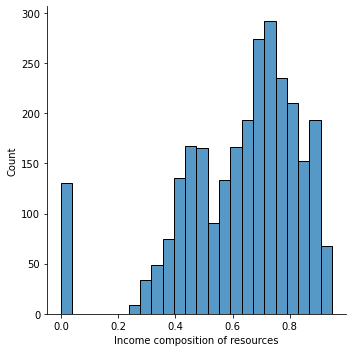

In [44]:
plt.figure(figsize=(12,5))
sns.displot(life['Income composition of resources'])
plt.show()

Income composition of resources is slightly left skewed. 

In [45]:
#find the skewness of Income composition of resources
print(life['Income composition of resources'].skew())

-1.143762720185521


Income composition of resources has a skewness of -1.143. We **will** transform this variable. 

<Figure size 864x360 with 0 Axes>

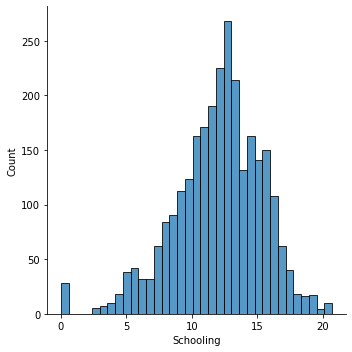

In [46]:
plt.figure(figsize=(12,5))
sns.displot(life['Schooling'])
plt.show()

Schooling is normally distributed. 

In [47]:
#find the skewness of Schooling
print(life['Schooling'].skew())

-0.6024365418785147


Schooling has a skewness of -0.602. We **will not** transform this variable. 

### Correlation

We will now examine the correlation between pairs of quantitative features.

In [48]:
#plot correlation heatmap to find out correlations
life.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

There are a couple of features that have strong correlations. GDP and Percentage expenditure have a strong positive correlation of 0.899. This means that nations with higher GDP per capita seem to spend more on health than nations with lower GDP per capita. Infant deaths and under-five deaths have a strong positive correlation of 0.997 which makes sense because these two features go hand in hand. Infants are younger than 5 years old thus, a high number of infant deaths means under-five dealths will also be high. Thinness 1-19 years and Thinness 5-9 years have strong positive correlations of 0.9391 meaning that the general thinness of children generally persists unitil adoloscence. Income composition of resources and Schooling have a relatively strong positive correlation of 0.800 meaning that a higher average years of schooling results in a general the higher Human Development Index in terms of income composition of resources. 

In regards to the response variable, Income composition of resources and Schooling have the highest correlations with life expectancy at 0.724 and 0.752, respectively. 

## Categorical Features

We will use frequency tables to look at the number of times a value was repeated in each of the categorical feature. There are 2 different categorical features, so each one is explored below. 

In [49]:
pd.set_option("display.max_rows", None)
life["Country"].value_counts(ascending=True)

Dominica                                                 1
Palau                                                    1
Nauru                                                    1
Tuvalu                                                   1
Cook Islands                                             1
Marshall Islands                                         1
Monaco                                                   1
Niue                                                     1
Saint Kitts and Nevis                                    1
San Marino                                               1
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Republic of Moldova                                     16
Romania                                                 

In [50]:
pd.set_option("display.max_rows", None)
life["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

# Data Cleaning

## Missing Values

In [51]:
#missing values in this dataset are denoted by "NaN" 
#checking to see how many features have missing values
print(life.isnull().sum())
print("Total = ", sum(life.isnull().sum()))

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Total =  2563


There are a total of 2,563 missing values with null values. Wee will look into removing these after exploring other missing values. 

In [52]:
# Below are the missing values with ' -  '
life.isin(['-']).sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [53]:
#missing values in this dataset denoted by ' '
life.isin(['']).sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [54]:
life.isin(["NaN"]).sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

From this we can see that all our missing values are 'null', so we will remove the rows that have a missing value

In [55]:
life1=life.dropna()
life1.shape

(1649, 22)

Here we lose 1,300 rows, so we will look into replacing missing values with the median of the features.

In [56]:
life2=life.fillna(life.median())

/usr/local/share/anaconda3/envs/ds320/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [57]:
life2.shape

(2938, 22)

In [58]:
life2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [59]:
life2.describe().T

count          mean           std  \
Year                             2938.0  2.007519e+03  4.613841e+00   
Life expectancy                  2938.0  6.923472e+01  9.509115e+00   
Adult Mortality                  2938.0  1.647257e+02  1.240862e+02   
infant deaths                    2938.0  3.030395e+01  1.179265e+02   
Alcohol                          2938.0  4.546875e+00  3.921946e+00   
percentage expenditure           2938.0  7.382513e+02  1.987915e+03   
Hepatitis B                      2938.0  8.302212e+01  2.299698e+01   
Measles                          2938.0  2.419592e+03  1.146727e+04   
 BMI                             2938.0  3.838118e+01  1.993537e+01   
under-five deaths                2938.0  4.203574e+01  1.604455e+02   
Polio                            2938.0  8.261777e+01  2.336717e+01   
Total expenditure                2938.0  5.924098e+00  2.400770e+00   
Diphtheria                       2938.0  8.239312e+01  2.365556e+01   
 HIV/AIDS                        2938.0  1.742103e+00  5.077785e+00   
GDP                              2938.0  6.611524e+03  1.329660e+04   
Population                       2938.0  1.023085e+07  5.402242e+07   
 thinness  1-19 years            2938.0  4.821886e+00  4.397621e+00   
 thinness 5-9 years              2938.0  4.852144e+00  4.485854e+00   
Income composition of resources  2938.0  6.303618e-01  2.051396e-01   
Schooling                        2938.0  1.200984e+01  3.265139e+00   

                                        min            25%           50%  \
Year                             2000.00000    2004.000000  2.008000e+03   
Life expectancy                    36.30000      63.200000  7.210000e+01   
Adult Mortality                     1.00000      74.000000  1.440000e+02   
infant deaths                       0.00000       0.000000  3.000000e+00   
Alcohol                             0.01000       1.092500  3.755000e+00   
percentage expenditure              0.00000       4.685343  6.491291e+01   
Hepatitis B                         1.00000      82.000000  9.200000e+01   
Measles                             0.00000       0.000000  1.700000e+01   
 BMI                                1.00000      19.400000  4.350000e+01   
under-five deaths                   0.00000       0.000000  4.000000e+00   
Polio                               3.00000      78.000000  9.300000e+01   
Total expenditure                   0.37000       4.370000  5.755000e+00   
Diphtheria                          2.00000      78.000000  9.300000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     580.486996  1.766948e+03   
Population                         34.00000  418917.250000  1.386542e+06   
 thinness  1-19 years               0.10000       1.600000  3.300000e+00   
 thinness 5-9 years                 0.10000       1.600000  3.300000e+00   
Income composition of resources     0.00000       0.504250  6.770000e-01   
Schooling                           0.00000      10.300000  1.230000e+01   

                                          75%           max  
Year                             2.012000e+03  2.015000e+03  
Life expectancy                  7.560000e+01  8.900000e+01  
Adult Mortality                  2.270000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.800000e+03  
Alcohol                          7.390000e+00  1.787000e+01  
percentage expenditure           4.415341e+02  1.947991e+04  
Hepatitis B                      9.600000e+01  9.900000e+01  
Measles                          3.602500e+02  2.121830e+05  
 BMI                             5.610000e+01  8.730000e+01  
under-five deaths                2.800000e+01  2.500000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.330000e+00  1.760000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        8.000000e-01  5.060000e+01  
GDP            

We have replaced the null values with the median of the features. 

**Note:** Since we changed our missing values to the median, this could affect our models and reduce the accuracy of the models. It would be better to drop the rows entirely. Dropping the rows however would decrease our dataset by around 45% which is very significant.

## Transformations

The following features will be transformed. 

*	Adult Mortality 
*	Infant Deaths
*   Alcohol
*	Percentage Expenditure
*	Hepatitis B
*	Measles
*	Under-Five Deaths
*	Polio
*	Diphtheria
*	HIV/AIDS
*	GDP
*	Population
*	Thinness 1-19 Years
*	Thinness 5-9 Years
*	Income Composition of Resources: 


In [60]:
#function to return the Box Cox power
import scipy.stats as stat

def bcpwr (y):
    skew1 = pd.DataFrame.skew (pd.DataFrame (y))
    print ("original skewness:", skew1)
    ymin = np.min (y)
    if ymin <= 0:
        offset = np.min (y [y>0]) / 2
    else:
        offset = 0
    bc = stat.boxcox (y + offset)
    return (bc [1])

In [61]:
#function to plot a histogram of the data, calculate the box cox power, and plot another histogram of the power-transformed feature 

def plotbc (y, plots=True):
    
    if plots:
        sns.histplot (y).set (title="Original Data")
        
    pwr = bcpwr (y)
    print ("power=", pwr)
    ymin = np.min (y)
    if ymin <= 0:
        offset = np.min (y [y>0]) / 2
    else:
        offset = 0
        
    if pwr < -0.75:
        bcy = -1 * (y + offset) ** -1
    elif pwr < -0.25:
        bcy = -0.5 * (y + offset) ** -0.5
    elif pwr < 0.25:
        bcy = np.log (y + offset)
    elif pwr < 0.75:
        bcy = pwr * y ** 0.5
    elif pwr < 1.25:
        bcy = y
    else:
        bcy = y ** 2
       
    if plots:
        plt.show()
        sns.histplot (bcy).set (title="Transformed Data")
        plt.show()
        
    return (bcy)

original skewness: Alcohol    0.649578
dtype: float64
power= 0.39485633068738246


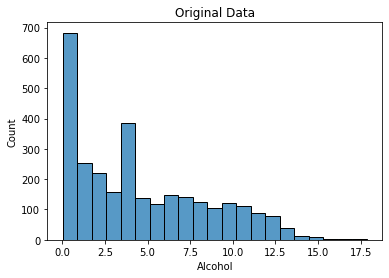

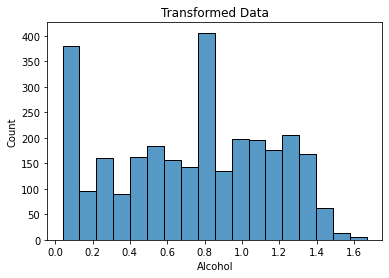

In [62]:
#transform Alcohol
life2['transformed_alcohol']= plotbc (life2['Alcohol'],plots=True)

In [63]:
print(life2['transformed_alcohol'].skew())

-0.13877102200302482


Alcohol now has a skewness of -0.138. This is better. 

original skewness: GDP    3.543756
dtype: float64
power= 0.032082040019177416


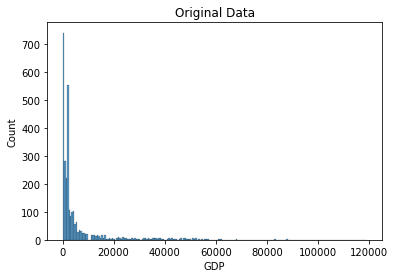

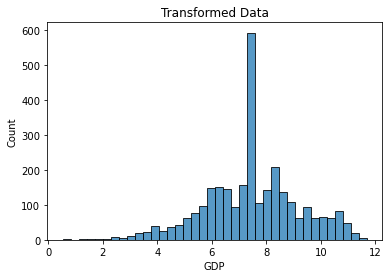

In [64]:
#transform Alcohol
life2['transformed_GDP']= plotbc (life2.GDP, plots=True)

In [65]:
print(life2['transformed_GDP'].skew())

-0.17347439470091394


GDP now has a skewness of -0.173. 

original skewness: Population    17.972837
dtype: float64
power= 0.07698791304505533


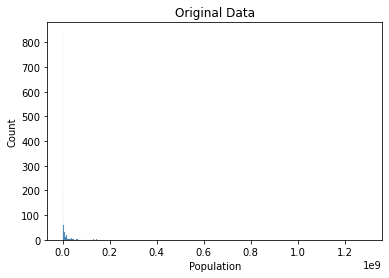

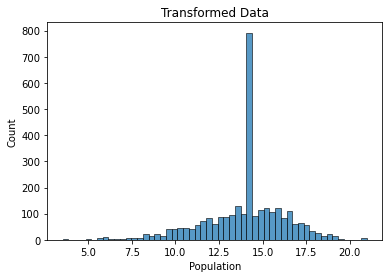

In [66]:
life2['transformed_population']= plotbc (life2['Population'], plots=True)

In [67]:
print(life2['transformed_population'].skew())

-0.7020583448791868


Population now has a skewness of -0.702. This is much better. 

original skewness:  thinness  1-19 years    1.729496
dtype: float64
power= 0.20526803253651627


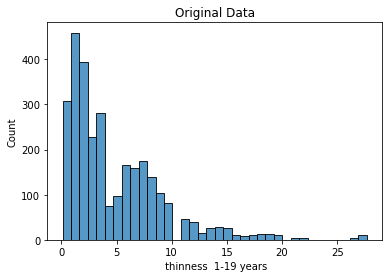

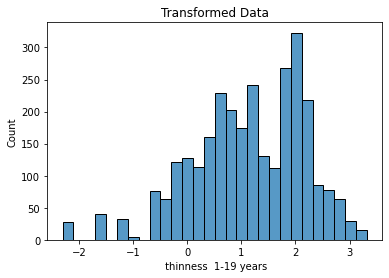

In [68]:
life2['transformed_thinness_1-19']= plotbc (life2[' thinness  1-19 years'], plots=True)

In [69]:
print(life2['transformed_thinness_1-19'].skew())

-0.584956851926998


Thinness 1-19 years now has a skewness of -0.585. 

original skewness:  thinness 5-9 years    1.795694
dtype: float64
power= 0.2215425961946553


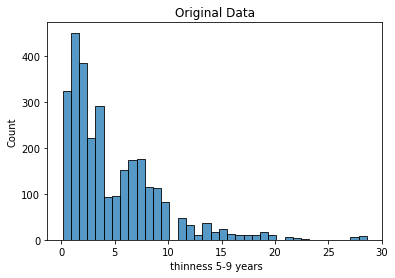

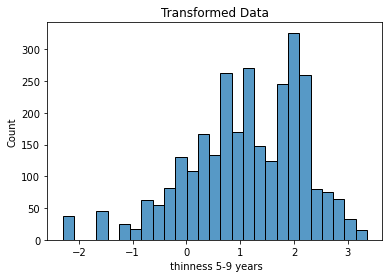

In [70]:
life2['transformed_thinness_5-9']= plotbc (life2[' thinness 5-9 years'], plots=True)

In [71]:
print(life2['transformed_thinness_5-9'].skew())

-0.6501446793258401


Thinness 5-9 years now has a skewness of -0.650. 

original skewness: Adult Mortality    1.177899
dtype: float64
power= 0.4238325040785284


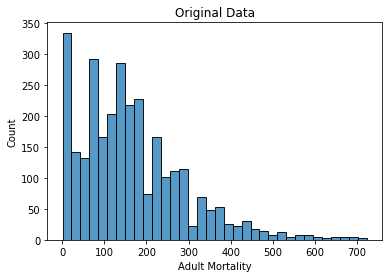

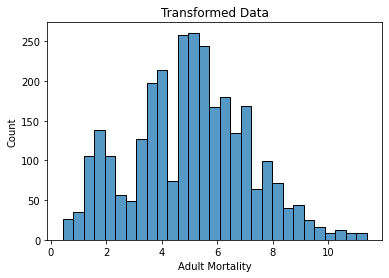

In [72]:
life2['transformed_adult_mortality']= plotbc (life2['Adult Mortality'], plots=True)

In [73]:
print(life2['transformed_adult_mortality'].skew())

0.09480285175271065


Adult Mortality now has a skewness of 0.095. 

<Figure size 864x360 with 0 Axes>

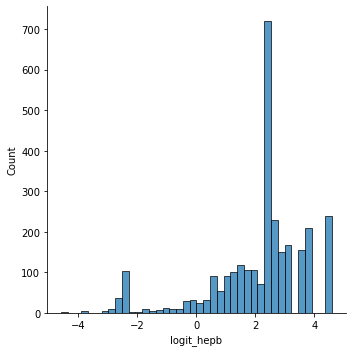

In [74]:
#logit transformation of Hepatitis B 
life2['logit_hepb']=np.log(((life2['Hepatitis B'])/(100-life2['Hepatitis B'])))
plt.figure(figsize=(12,5))
sns.displot(life2['logit_hepb'])
plt.show()

In [75]:
print(life2['logit_hepb'].skew())

-1.1922619259463503


The skewness of Hepatitis B from a logit function is -1.19. Lets compare this transformation with the boxcox one

original skewness: Hepatitis B   -2.281697
dtype: float64
power= 3.0425565548829936


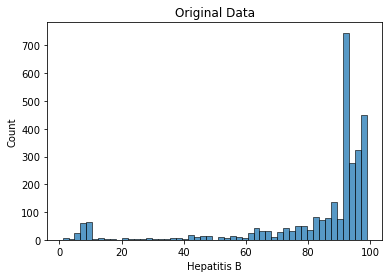

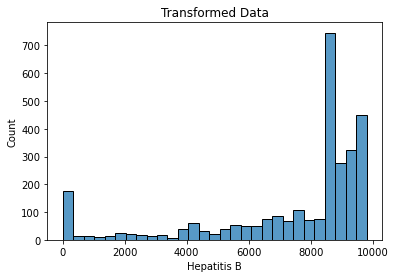

In [76]:
life2['transformed_hepb']= plotbc (life2['Hepatitis B'], plots=True)

In [77]:
print(life2['transformed_hepb'].skew())

-1.6068896960728278


Using a boxbox transformation the skewness is -1.61. The logit transformation is better, we will keep that transformation. 

We will be using a similar rational for the left skewed features containing percentages and keep the better transformations (logit vs boxcox)

<Figure size 864x360 with 0 Axes>

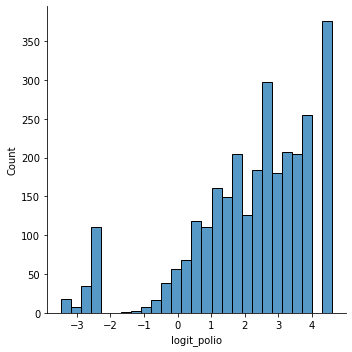

In [78]:
life2['logit_polio']=np.log(((life2['Polio'])/(100-life2['Polio'])))
plt.figure(figsize=(12,5))
sns.displot(life2['logit_polio'])
plt.show()

In [79]:
print(life2['logit_polio'].skew())

-0.9814957238407342


Logit Polio has a skewess of -0.981. 

original skewness: Polio   -2.108909
dtype: float64
power= 2.7383467571848232


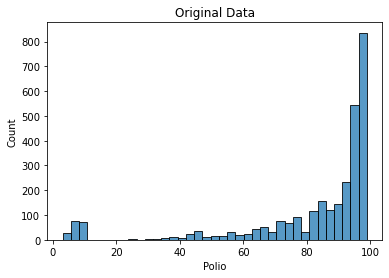

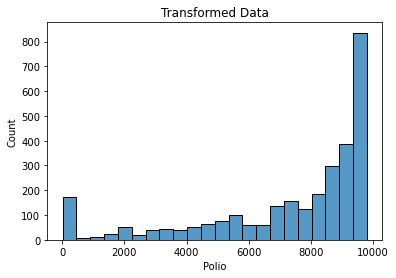

In [80]:
life2['transformed_polio']= plotbc (life2['Polio'], plots=True)

In [81]:
print(life2['transformed_polio'].skew())

-1.35969875153538


The logit transformation has a better skewness we will keep that feature and drop the boxcox transformation. 

<Figure size 864x360 with 0 Axes>

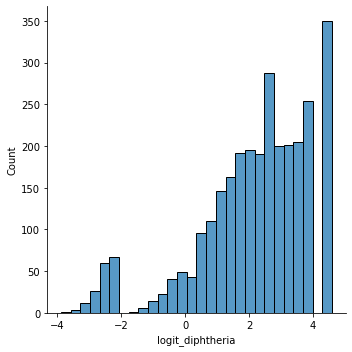

In [82]:
life2['logit_diphtheria']=np.log(((life2['Diphtheria '])/(100-life2['Diphtheria '])))
plt.figure(figsize=(12,5))
sns.displot(life2['logit_diphtheria'])
plt.show()

In [83]:
print(life2['logit_diphtheria'].skew())

-0.9933185704830463


Logit Diphtheria has a skewness of -0.993.

original skewness: Diphtheria    -2.083566
dtype: float64
power= 2.748283444655169


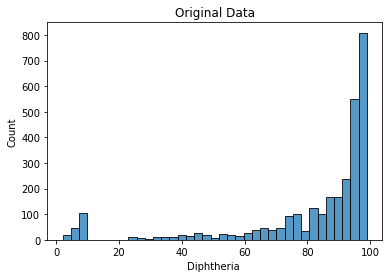

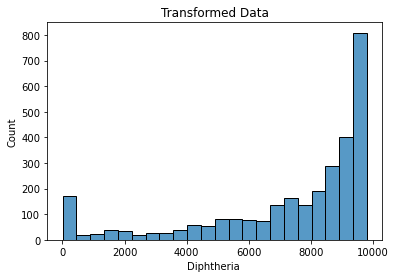

In [84]:
life2['transformed_diptheria']= plotbc (life2['Diphtheria '], plots=True)

In [85]:
print(life2['transformed_diptheria'].skew())

-1.3770759090943714


The logit transformation has a better skewness we will keep that feature and drop the boxcox transformation.

<Figure size 864x360 with 0 Axes>

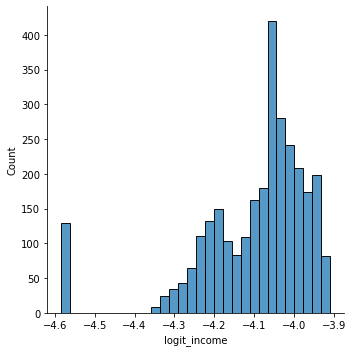

In [86]:
life2['logit_income']=np.log(((life2['Income composition of resources']+1)/(100-(life2['Income composition of resources']+2))))
plt.figure(figsize=(12,5))
sns.displot(life2['logit_income'])
plt.show()

In [87]:
print(life2['logit_income'].skew())

-1.7141375736911317


Logit of Income has a skewness of -1.71. 

original skewness: Income composition of resources   -1.212526
dtype: float64
power= 1.9933270790071413


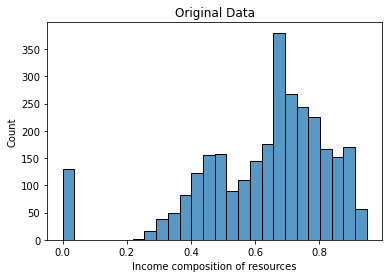

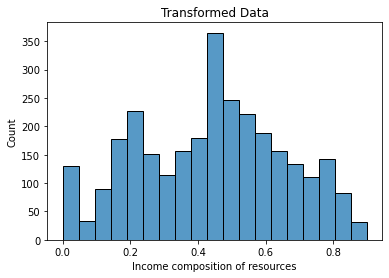

In [88]:
life2['transformed_income']= plotbc (life2['Income composition of resources'], plots=True)

In [89]:
print(life2['transformed_income'].skew())

-0.11444151659295417


The boxcox transformation of income has a better skewness and distribution we will keep this transformation and drop logit of income. 

original skewness: under-five deaths     9.495065
dtype: float64
power= -0.12410546425849667


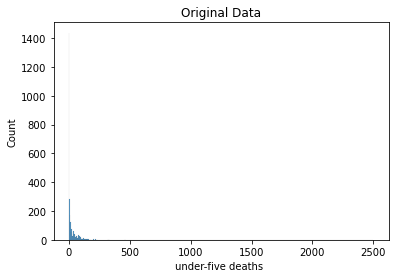

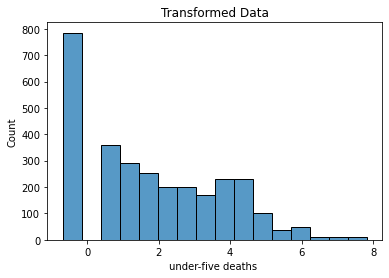

In [90]:
life2['transformed_under_five_deaths']= plotbc (life2['under-five deaths '], plots=True)

In [91]:
print(life2['transformed_under_five_deaths'].skew())

0.43389857467996823


Under five deaths now has a skewness of 0.434. 

original skewness:  HIV/AIDS    5.396112
dtype: float64
power= -0.657076030347101


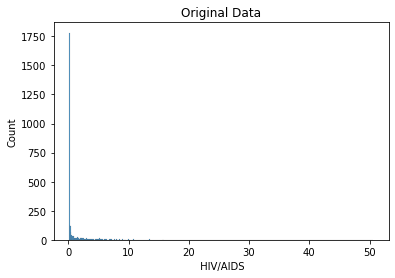

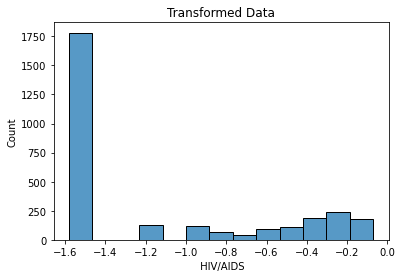

In [92]:
life2['transformed_HIV/AIDS']= plotbc (life2[' HIV/AIDS'], plots=True)

In [93]:
print(life2['transformed_HIV/AIDS'].skew())

0.7572460514126265


HIV/AIDs now has a skewness of 0.757. 

original skewness: percentage expenditure    4.652051
dtype: float64
power= 0.09226308046961575


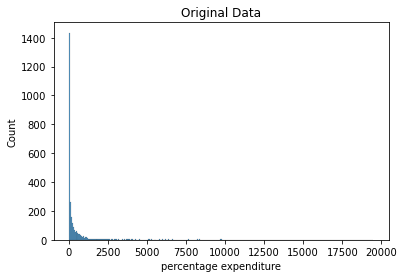

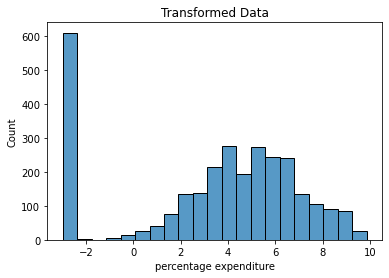

In [94]:
life2['transformed_percentage_expenditure']= plotbc (life2['percentage expenditure'], plots=True)

In [95]:
print(life2['transformed_percentage_expenditure'].skew())

-0.6132122888199832


Transformed percentage expenditure now has a skewness of -0.613. 

original skewness: Measles     9.441332
dtype: float64
power= -0.08229698184172683


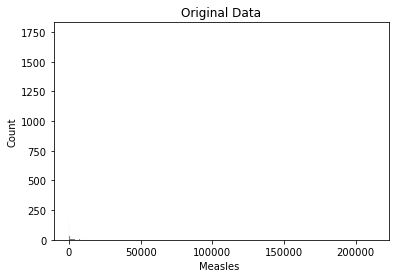

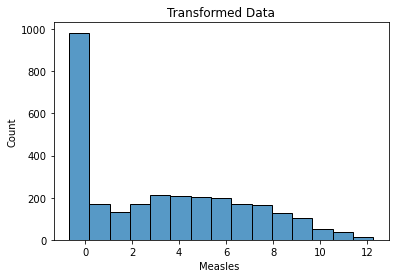

In [96]:
life2['transformed_Measles']= plotbc (life2['Measles '], plots=True)

In [97]:
print(life2['transformed_Measles'].skew())

0.4321728839247568


Transformed Measles now has a skewness of 0.432

original skewness: infant deaths    9.786963
dtype: float64
power= -0.1394520484126051


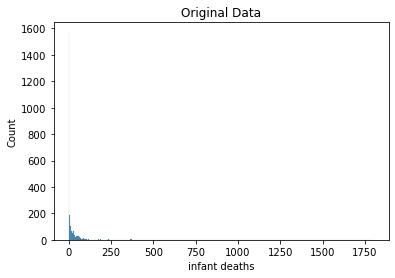

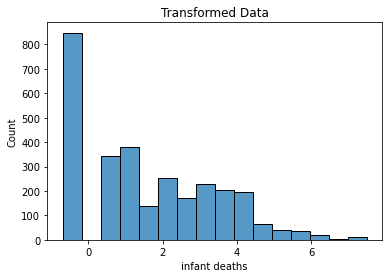

In [98]:
life2['transformed_infant_deaths']= plotbc (life2['infant deaths'], plots=True)

In [99]:
print(life2['transformed_infant_deaths'].skew())

0.4698509575475381


Infant deaths now has a skewness of 0.470. 

Let us drop the quantitative variables which have been transformed.

In [100]:
#drop initial and some transformed values (those used for comparison)
life2.drop('infant deaths', axis = 1, inplace=True)
life2.drop('Adult Mortality', axis = 1, inplace=True)
life2.drop('percentage expenditure', axis = 1, inplace=True)
life2.drop('Hepatitis B', axis = 1, inplace=True)
life2.drop('Measles ', axis = 1, inplace=True)
life2.drop('under-five deaths ', axis = 1, inplace=True)
life2.drop('Polio', axis = 1, inplace=True)
life2.drop('Diphtheria ', axis = 1, inplace=True)
life2.drop(' HIV/AIDS', axis = 1, inplace=True)
life2.drop('GDP', axis = 1, inplace=True)
life2.drop('Population', axis = 1, inplace=True)
life2.drop(' thinness  1-19 years', axis = 1, inplace=True)
life2.drop(' thinness 5-9 years', axis = 1, inplace=True)
life2.drop('Income composition of resources', axis = 1, inplace=True)
life2.drop('logit_income', axis = 1, inplace=True)
life2.drop('transformed_diptheria', axis = 1, inplace=True)
life2.drop('transformed_polio', axis = 1, inplace=True)
life2.drop('transformed_hepb', axis = 1, inplace=True)
life2.drop('Alcohol', axis = 1, inplace=True)

In [101]:
#plot correlation heatmap to find out correlations
life2.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

## Correlation between all features

Here we see a slightly similar correlation as we saw in the correlation before transformations. Like mentioned before, there is a high correlation between thinness 1-19 and 5-9 as they are overlapping data. There is a correlation of 0.7829 between transformed_income and Life expectancy. This says that income is a good indicator of life expectancy, which could be due to access to medical aid, food, and shelter. Like seen before, there is a high correlation between schooling and income, which means that people with higher income get better schooling and vice-versa. Another high correlation between schooling and life expectancy (0.7151) which is understandable.

## One-hot Encoding

The following categorical features will be one-hot encoded. 

* Country
* Status

In [102]:
life3 = pd.get_dummies(life2, columns = ['Country', 'Status',])

In [103]:
life3.head()

Year  Life expectancy    BMI   Total expenditure  Schooling  \
0  2015              65.0   19.1               8.16       10.1   
1  2014              59.9   18.6               8.18       10.0   
2  2013              59.9   18.1               8.13        9.9   
3  2012              59.5   17.6               8.52        9.8   
4  2011              59.2   17.2               7.87        9.5   

   transformed_alcohol  transformed_GDP  transformed_population  \
0             0.039486         6.370345               17.334091   
1             0.039486         6.417870               12.699494   
2             0.039486         6.448486               17.272826   
3             0.039486         6.507217               15.123021   
4             0.039486         4.151626               14.906964   

   transformed_thinness_1-19  transformed_thinness_5-9  ...  Country_Uruguay  \
0                   2.844909                  2.850707  ...                0   
1                   2.862201                  2.862201  ...                0   
2                   2.873565                  2.873565  ...                0   
3                   2.884801                  2.890372  ...                0   
4                   2.901422                  2.901422  ...                0   

   Country_Uzbekistan  Country_Vanuatu  \
0                   0                0   
1                   0                0   
2                   0                0   
3                   0                0   
4                   0                0   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                           0                 0   
1                                           0                 0   
2                                           0                 0   
3                                           0                 0   
4                                           0                 0   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  Status_Developed  \
0              0               0                 0                 0   
1              0               0                 0                 0   
2              0               0                 0                 0   
3              0               0                 0                 0   
4              0               0                 0                 0   

   Status_Developing  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 215 columns]

In [104]:
life3.head()

Year  Life expectancy    BMI   Total expenditure  Schooling  \
0  2015              65.0   19.1               8.16       10.1   
1  2014              59.9   18.6               8.18       10.0   
2  2013              59.9   18.1               8.13        9.9   
3  2012              59.5   17.6               8.52        9.8   
4  2011              59.2   17.2               7.87        9.5   

   transformed_alcohol  transformed_GDP  transformed_population  \
0             0.039486         6.370345               17.334091   
1             0.039486         6.417870               12.699494   
2             0.039486         6.448486               17.272826   
3             0.039486         6.507217               15.123021   
4             0.039486         4.151626               14.906964   

   transformed_thinness_1-19  transformed_thinness_5-9  ...  Country_Uruguay  \
0                   2.844909                  2.850707  ...                0   
1                   2.862201                  2.862201  ...                0   
2                   2.873565                  2.873565  ...                0   
3                   2.884801                  2.890372  ...                0   
4                   2.901422                  2.901422  ...                0   

   Country_Uzbekistan  Country_Vanuatu  \
0                   0                0   
1                   0                0   
2                   0                0   
3                   0                0   
4                   0                0   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                           0                 0   
1                                           0                 0   
2                                           0                 0   
3                                           0                 0   
4                                           0                 0   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  Status_Developed  \
0              0               0                 0                 0   
1              0               0                 0                 0   
2              0               0                 0                 0   
3              0               0                 0                 0   
4              0               0                 0                 0   

   Status_Developing  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  

[5 rows x 215 columns]

In [105]:
life3.shape

(2938, 215)

We now have 2938 rows and 215 columns.

In [106]:
life3.describe().T

count         mean  \
Year                                                2938.0  2007.518720   
Life expectancy                                     2938.0    69.234717   
 BMI                                                2938.0    38.381178   
Total expenditure                                   2938.0     5.924098   
Schooling                                           2938.0    12.009837   
transformed_alcohol                                 2938.0     0.730471   
transformed_GDP                                     2938.0     7.468519   
transformed_population                              2938.0    13.948170   
transformed_thinness_1-19                           2938.0     1.129949   
transformed_thinness_5-9                            2938.0     1.118165   
transformed_adult_mortality                         2938.0     5.016870   
logit_hepb                                          2938.0     2.163855   
logit_polio                                         2938.0     2.245548   
logit_diphtheria                                    2938.0     2.218973   
transformed_income                                  2938.0     0.439424   
transformed_under_five_deaths                       2938.0     1.686855   
transformed_HIV/AIDS                                2938.0    -1.157451   
transformed_percentage_expenditure                  2938.0     3.329851   
transformed_Measles                                 2938.0     3.100809   
transformed_infant_deaths                           2938.0     1.499426   
Country_Afghanistan                                 2938.0     0.005446   
Country_Albania                                     2938.0     0.005446   
Country_Algeria                                     2938.0     0.005446   
Country_Angola                                      2938.0     0.005446   
Country_Antigua and Barbuda                         2938.0     0.005446   
Country_Argentina                                   2938.0     0.005446   
Country_Armenia                                     2938.0     0.005446   
Country_Australia                                   2938.0     0.005446   
Country_Austria                                     2938.0     0.005446   
Country_Azerbaijan                                  2938.0     0.005446   
Country_Bahamas                                     2938.0     0.005446   
Country_Bahrain                                     2938.0     0.005446   
Country_Bangladesh                                  2938.0     0.005446   
Country_Barbados                                    2938.0     0.005446   
Country_Belarus                                     2938.0     0.005446   
Country_Belgium                                     2938.0     0.005446   
Country_Belize                                      2938.0     0.005446   
Country_Benin                                       2938.0     0.005446   
Country_Bhutan                                      2938.0     0.005446   
Country_Bolivia (Plurinational State of)            2938.0     0.005446   
Country_Bosnia and Herzegovina                      2938.0     0.005446   
Country_Botswana                                    2938.0     0.005446   
Country_Brazil                                      2938.0     0.005446   
Country_Brunei Darussalam                           2938.0     0.005446   
Country_Bulgaria                                    2938.0     0.005446   
Country_Burkina Faso                                2938.0     0.005446   
Country_Burundi                                     2938.0     0.005446   
Country_Cabo Verde                                  2938.0     0.005446   
Country_Cambodia                                    2938.0     0.005446   
Country_Cameroon                                    2938.0     0.005446   
Country_Canada                                      2938.0     0.005446   
Country_Central African Republic                    2938.0     0.005446   
Country_Chad                                        2938.0     0.005446   
Cou

# Preparation of Data

In [107]:
# Split Train and Test Set (80/20)
X = life3.drop('Life expectancy ', axis=1)
Y = life3['Life expectancy ']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2350, 214)
(588, 214)
(2350,)
(588,)


In [109]:
#standardize features
#we will add polynomial features to these futures for our second linear regression model 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [110]:
pd.DataFrame (X_train_scaled)

0         1         2         3         4         5         6    \
0    -0.116557 -0.656964 -0.673352 -0.043973  0.424266  0.334839 -0.367557   
1    -1.417792 -0.827298 -0.303862 -0.320601  0.096714 -0.187474 -0.406986   
2     0.750932  0.294898  0.688363  0.263392  1.306562  0.005283  0.081737   
3     1.184677  1.036349  0.555512  0.816648 -0.676129  0.509250 -0.011923   
4    -1.200920 -0.531719 -1.046993  0.386338 -1.410228  1.317949  0.081737   
5    -1.200920 -0.977592 -1.420634 -1.181222  0.569816  0.254516 -1.220155   
6    -0.984047  0.049418  0.360389 -1.488587 -1.024291 -0.634887 -1.253070   
7     0.750932  0.640575 -0.000798  0.355601  0.139872  0.636263  1.108180   
8    -0.767175  0.134585  0.028263 -0.259128 -0.498961 -0.457583  0.334042   
9    -0.984047  0.795879  0.123749  1.001067  1.098643  0.686438 -0.470713   
10   -0.984047  0.360026  0.223387  0.171183  0.067373 -1.146155  0.063544   
11    1.618422  0.800889 -0.069298  0.509284  0.083324  1.310336  0.081737   
12    0.967805 -0.797239 -0.669200 -1.150486 -1.250577 -1.485614  0.077688   
13   -1.200920  1.321908 -0.980568  0.570757 -1.656960  1.349663  0.081737   
14   -0.550302 -0.972582  2.627145 -1.304168  0.101559 -1.051386  0.684962   
15    1.401550  1.437134 -0.515592  1.154749 -1.467571  1.537779  0.081737   
16    0.967805 -1.082798 -0.635988 -0.228392 -0.084381 -0.111013  2.017260   
17   -1.417792 -1.228082  0.406056 -2.195525 -1.232990 -1.270899 -0.120002   
18    1.184677 -1.057749 -0.577866 -0.166919 -0.081694 -0.108920  2.022289   
19   -1.634665 -1.062758 -0.407651 -1.734478 -0.155830 -1.031372  0.034940   
20    0.100315 -0.446553 -0.548805  0.478547 -0.257396 -1.770580  0.035248   
21    1.618422 -0.501660 -0.069298 -0.197655  0.083324 -0.146628  1.364423   
22    0.317188  0.344996  0.829516 -0.843121 -0.710012 -0.240566 -1.329258   
23   -0.333430  0.861006  0.538906  1.708006  1.719914  1.999580  0.564567   
24    0.534060  1.221712  0.597028  1.124013 -0.215963  0.429525 -1.162495   
25    0.534060  1.006290 -0.702413  0.785912 -0.331233  0.427929 -1.110827   
26    0.317188 -1.734072  0.161114 -0.074709 -0.236538 -0.213567 -0.608045   
27   -1.417792  0.830947  1.647375  1.093276  1.777553  1.487122  1.707368   
28    0.750932  1.522300 -1.370815  0.417074 -1.617736  1.930747  0.081737   
29    0.534060 -0.166004 -0.802050  0.232655 -1.088791 -0.343023  1.372578   
30    1.618422 -0.271209 -0.069298  1.031804 -0.484725  1.992061  0.081737   
31    0.967805 -0.621896  0.090537  0.078973 -0.047149  0.005283  0.081737   
32    1.401550  0.840967  0.352086  0.355601 -0.248422  0.479284  0.729753   
33   -1.200920  0.835957  0.227539  0.478547  1.559956 -0.098122  0.923413   
34    0.317188  1.011300  0.908396  0.447811  1.448413  1.175899 -0.357667   
35   -1.200920  0.460222 -0.216679 -0.382074 -0.150221 -0.468317 -0.528956   
36    1.401550  0.455212 -1.337602 -0.382074 -0.139061  0.881688  0.670144   
37    0.967805  1.201673  0.626089  0.171183  1.167035  0.005283  0.081737   
38   -1.634665 -0.055788 -0.806202 -1.795951 -0.942582 -0.593281  0.678381   
39   -0.984047  1.041359  1.402432  2.015370  1.428737  0.442411  0.078505   
40   -0.767175  0.355016  0.086385 -0.320601  0.096714 -1.288159 -1.310629   
41    1.618422 -0.301268 -0.069298 -0.412810  0.083324 -1.344677  0.274782   
42    1.184677  0.931143  0.235842  0.908858 -1.656960  0.005283  0.081737   
43   -1.200920  0.324957 -0.054768  0.078973  0.649563 -2.222729  0.875958   
44   -1.634665 -1.824249 -0.004949 -1.027540  0.248177 -1.313427  0.395954   
45   -0.550302 -1.774150 -0.905839  0.171183 -0.595758  1.651357  0.081737   
46   -1.634665  0.630555  0.252448  0.294128  0.820839 -1.746704  0.806756   
47    0.317188  1.201673  0.638544  1.093276 -0.239500  1.609465 -1.170331   
48    0.534060  0.921124  2.440324  1.462114  1.284491  0.701366  0.676488   
49    1.184677  1.121516  2.274262  1.861688  1.038228  1.969312  0.165215   
50   -1.634665 -0.035749 -0.56541

In [111]:
pd.DataFrame (X_test_scaled)

0         1         2         3         4         5         6    \
0   -0.312495  0.558273 -0.909656 -0.144325 -0.803256  0.001967  1.168131   
1   -0.312495  1.043394  0.429815  0.612032  1.474071  1.054524 -3.244821   
2   -0.096067  0.997914  0.341080  0.521269  0.353416  0.689814 -0.249635   
3    1.418925  1.285954 -0.402601  0.793558 -0.554508  1.499427  0.086325   
4   -1.611059 -1.164914 -0.529364 -1.051955 -0.576938 -2.082248  0.425444   
5    0.120360 -1.063848 -1.273045 -1.778058 -1.094641 -0.359126  0.948734   
6   -0.528922  0.234860  0.801655 -1.082209 -0.836844 -1.684957 -0.361642   
7    0.120360 -1.599501 -0.508237  0.400252  0.326213 -0.796098  0.386662   
8    1.418925  0.901900  1.536885  0.702795  0.145495  0.612391 -1.429067   
9    0.769643 -1.730888  1.131241 -0.204834  0.398654  0.455526  0.035131   
10  -1.611059 -1.746048 -0.613873 -1.505769  0.117556 -1.832717  1.079627   
11   1.635352 -0.477661 -0.075128  0.127963  0.080825  0.003472  0.086325   
12   0.769643 -0.821288 -0.508237 -1.051955 -1.281848 -0.757407 -0.949725   
13  -0.312495 -0.947621  0.607284  0.037200 -0.536142  0.522356 -3.363917   
14   1.202497  0.280340  0.163611  0.037200 -1.624238 -1.233865 -1.468371   
15   0.336788  0.280340  0.315727 -1.021700  0.526991 -0.545604 -0.055107   
16  -1.611059 -1.190181 -0.056113 -1.172972 -0.717764 -1.110139  0.139527   
17  -0.745350  0.992860 -1.927991  1.368390  1.474071  1.676199  0.824711   
18  -1.611059  0.285393 -0.013858  0.097709  0.662887 -1.032023  0.840027   
19  -1.394632  0.836207  1.148142  1.701187  0.456848  1.744372  0.574960   
20  -0.745350  0.886740  1.093211  1.398644  1.151619  1.764589  1.106072   
21   0.769643  1.407234  2.242536  2.366782  1.138084  1.742567  0.086325   
22   0.336788  0.603753  0.374884 -0.174580 -0.016362 -0.102552  0.669125   
23  -1.394632  1.240474  1.118564 -0.537631 -0.159004  0.003472  0.086325   
24   1.635352 -1.594448 -0.075128  0.279235  0.080825  0.573698 -0.472741   
25  -0.745350  0.492580 -0.698383  0.188472  0.390501  0.181547 -0.086653   
26   1.635352 -0.659581 -0.075128 -0.719157  0.080825 -0.618338 -0.182831   
27  -0.096067 -0.982994 -0.022309 -0.537631 -1.345903 -0.004836 -0.204416   
28   1.202497 -1.574235  1.460826  1.701187  0.595007 -0.173572 -0.274750   
29   1.418925  0.795780  1.465052 -0.083817  0.031060  0.066468 -0.250900   
30  -0.528922 -1.786475 -0.854725 -0.083817  0.188894 -0.217543  1.796388   
31  -0.096067  0.629020  0.945320  0.188472  1.011675  0.197675 -3.210824   
32  -0.745350  0.629020  1.465052  0.127963  0.195657 -1.066617  0.501658   
33  -0.745350  0.229807  0.827008 -0.446869 -0.104702 -0.206792 -0.182587   
34  -0.961777  0.927167  0.734048  0.521269  1.577593  2.043273 -1.331286   
35  -1.394632 -1.038581 -0.123720 -1.838567 -0.375736 -1.086525  1.160929   
36   1.418925 -0.977941  0.543902 -0.567886 -1.624238 -0.504171  1.465923   
37  -1.611059  1.417341 -0.499786  0.551524 -0.683881 -1.071679 -1.960366   
38  -0.745350 -1.690461 -0.689932 -0.477123 -0.147993 -0.106647 -0.358558   
39  -0.096067  1.104034  1.021379  0.521269 -0.998359  0.255916  0.705913   
40  -1.611059 -1.053741 -0.668804 -0.779666 -0.743950 -2.370611 -0.338111   
41   0.986070 -0.750541 -0.347670  0.037200 -1.624238 -0.641739  0.748215   
42  -0.745350  0.987807 -1.467416  0.158218 -0.482682  1.708252  0.086325   
43  -0.961777 -1.574235  1.008702  2.639071  1.212487  1.464027 -0.717428   
44   0.986070  1.255634  1.186172  1.096101  0.511595 -0.055167  0.457263   
45  -0.312495 -0.952674 -0.820921 -1.778058 -0.565668 -0.914641 -0.406376   
46  -1.178205  0.957487  0.970673  1.005338  1.104725  1.432635 -1.230608   
47  -0.096067 -0.907194  0.298825  0.006946 -0.479200 -1.978358 -3.344489   
48   1.202497 -0.972888 -0.009633 -1.324243  0.281489 -0.519872  0.188043   
49   1.202497 -1.033528 -1.289947 -0.567886 -1.624238 -0.345850  2.045752   
50  -1.178205 -0.952674 -0.075128  0.127963 -1.624238  0.003472  0.086325   
51  -1

# Linear Regression 

We will fit the data into linear regression models. Our performance measures are **R2 (R squared)** and **RMSE**

## First Model

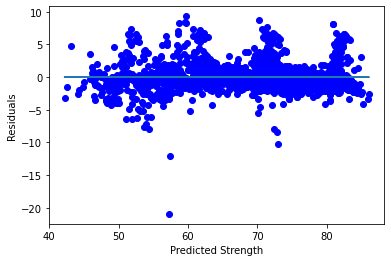

In [112]:
# first linear regression (training set)
lrm = LinearRegression()
lrm.fit (X_train, Y_train)
lrm_pred = lrm.predict (X_train)
lrm_resid = Y_train - lrm_pred
plt.plot (lrm_pred, lrm_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (lrm_pred, 0*lrm_pred)

We see a few outliers in the graph above, but apart from those there is a nice spread of data points on the predicted vs. residual plot. The large outlier beyond at around -20 is concerning. 

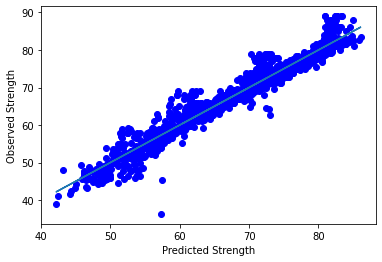

In [113]:
# observed label vs predicted
plt.plot (lrm_pred, Y_train, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrm_pred, lrm_pred)

Generally, our model is good at predicting life expectancy. There are a few outliers though. 

In [114]:
print ("Train R2=", round (r2_score (Y_train, lrm_pred), 5))
rmse = np.sqrt (mean_squared_error (Y_train, lrm_pred))
print ("RMSE=", round (rmse, 5))

Train R2= 0.95783
RMSE= 1.96225


For our training set we got a R2 value of 0.958, which is very good. This shows that the life expectancy can be explained pretty accurately with our model (95.8%), with very little error. We also have a RMSE of 1.962, which is relatively low showing that the training set is a good predictor of the training predicting variable. (We should expect an error of +-2years)

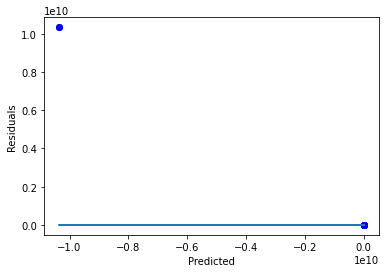

In [115]:
# Test set 
lrmt_pred = lrm.predict (X_test)
lrmt_resid = Y_test - lrmt_pred
plt.plot (lrmt_pred, lrmt_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted")
plt.plot (lrmt_pred, 0*lrmt_pred)

Our graph does not look like we wanted it, and does not look like the graphs we see in the training model. We will look into this to try and understand our test model. 

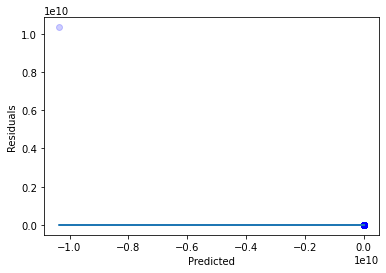

In [116]:
# Test set 
lrmt_pred = lrm.predict (X_test)
lrmt_resid = Y_test - lrmt_pred
plt.plot (lrmt_pred, lrmt_resid, 'bo', alpha = 0.1)
plt.ylabel ("Residuals")
plt.xlabel ("Predicted")
plt.plot (lrmt_pred, 0*lrmt_pred)

(-10.0, 15.0)

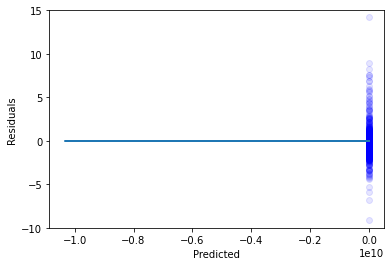

In [117]:
# Test set 
lrmt_pred = lrm.predict (X_test)
lrmt_resid = Y_test - lrmt_pred
plt.plot (lrmt_pred, lrmt_resid, 'bo', alpha=0.1)
plt.ylabel ("Residuals")
plt.xlabel ("Predicted")
plt.plot (lrmt_pred, 0*lrmt_pred)
plt.ylim(-10, 15)

In [118]:
lrmt_resid.loc[lrmt_resid < -100]

Series([], Name: Life expectancy , dtype: float64)

In [119]:
X_test2= X_test.drop([2216,2713])
Y_test2= Y_test.drop([2216,2713])
X_test2.shape
Y_test2.shape

(586,)

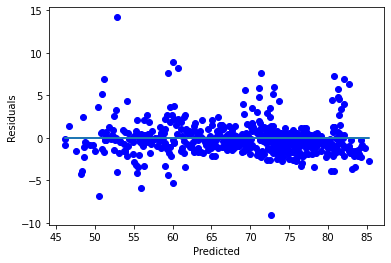

In [120]:
# Test set 
lrmt2_pred = lrm.predict (X_test2)
lrmt2_resid = Y_test2 - lrmt2_pred
plt.plot (lrmt2_pred, lrmt2_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted")
plt.plot (lrmt2_pred, 0*lrmt2_pred)

The reiduals have good uniform variance. There are a few outliers. 

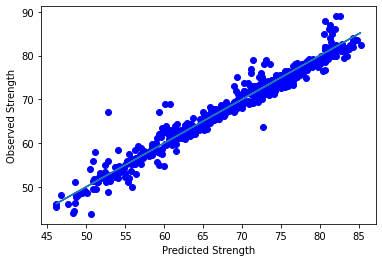

In [121]:
# observed label vs predicted
plt.plot (lrmt2_pred, Y_test2, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrmt2_pred, lrmt2_pred)

The model fits well. It is good at predicting the predictor variable. 

In [122]:
print ("Test R2=", round (r2_score (Y_test2, lrmt2_pred), 5))
rmse = np.sqrt (mean_squared_error (Y_test2, lrmt2_pred))
print ("RMSE=", round (rmse, 5))

Test R2= 0.95602
RMSE= 1.95533


For our test set, we got a R2 of 0.956 and a RMSE of 1.955 which are both similar to our training set model. 

## Second Model - Linear Regression

We will transform our variable using polynomial features to see if they provide even better results. 

### Add Polynomial Features

In [123]:
poly = PolynomialFeatures (2, interaction_only=True)
Xpoly = pd.DataFrame (poly.fit_transform (X_train_scaled))

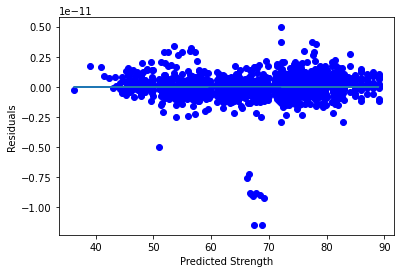

In [124]:
lrmsp = LinearRegression()
lrmsp.fit (Xpoly,Y_train)
lrmsp_pred = lrmsp.predict (Xpoly)
lrmsp_resid = Y_train - lrmsp_pred
plt.plot (lrmsp_pred, lrmsp_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (lrmsp_pred, 0*lrmsp_pred)

The residuals have a good uniform variance. There are a couple of outliers though. 

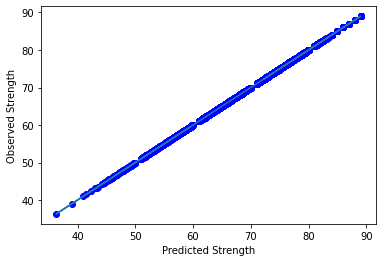

In [125]:
# observed label vs predicted

plt.plot (lrmsp_pred, Y_train, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrmsp_pred, lrmsp_pred)

In [126]:
print ("Test R2=", round (r2_score (Y_train, lrmsp_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_train, lrmsp_pred))
print ("RMSE=", round (rmse, 2))

Test R2= 1.0
RMSE= 0.0


We see a perfect fit for this model. So we will investigate a little bit before trying a different model.

In [127]:
poly = PolynomialFeatures (2, interaction_only=True)
Xpolyt = pd.DataFrame (poly.fit_transform (X_test_scaled))

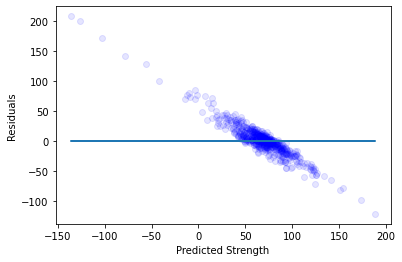

In [128]:
lrmspt_pred = lrmsp.predict (Xpolyt)
lrmspt_resid = Y_test - lrmspt_pred
plt.plot (lrmspt_pred, lrmspt_resid, 'bo', alpha=0.1)
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspt_pred, 0*lrmspt_pred)

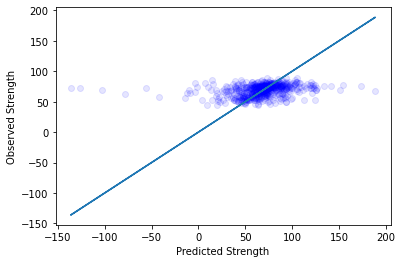

In [129]:
# observed label vs predicted
plt.plot (lrmspt_pred, Y_test, 'bo', alpha=.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspt_pred, lrmspt_pred)

In [130]:
print ("Test R2=", round (r2_score (Y_test, lrmspt_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_test, lrmspt_pred))
print ("RMSE=", round (rmse, 2))

Test R2= -8.136
RMSE= 28.14


The test set for the second model had a very poor performance with a R2 or -8.136 and and RMSE of 28.14 This shows a very poor predictability from our data and model.

## Second Model - Ridge Regression

Since the previous model gave us perfect results for our training set and very bad results for our test set, we can assume that the model was overfit to the train set. To try and fix this, we looked at using a Ridge Regression which is similar to a step-wise regression model.

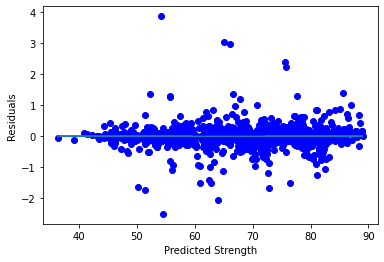

In [131]:
lrmspridge = Ridge()
lrmspridge.fit (Xpoly,Y_train)
lrmspridge_pred = lrmspridge.predict (Xpoly)
lrmspridge_resid = Y_train - lrmspridge_pred
plt.plot (lrmspridge_pred, lrmspridge_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspridge_pred, 0*lrmspridge_pred)

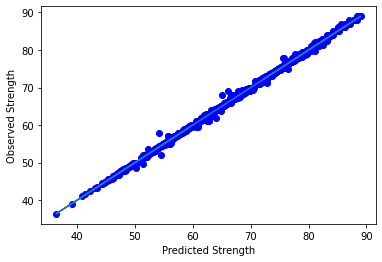

In [132]:
# observed label vs predicted

plt.plot (lrmspridge_pred, Y_train, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspridge_pred, lrmspridge_pred)

In [133]:
print ("Test R2=", round (r2_score (Y_train, lrmspridge_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_train, lrmspridge_pred))
print ("RMSE=", round (rmse, 2))

Test R2= 0.999
RMSE= 0.26


For this model we got a high predictability with a R2 or 0.999 and an RMSE of 0.26. This is better than the perfect prediction using the Linear Regression model above. This shows that our data is highly fit but not overfitted.

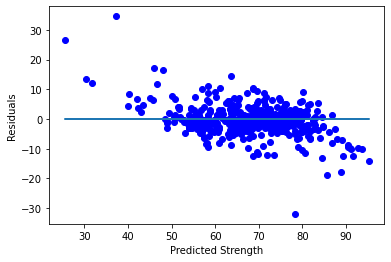

In [134]:
lrmspt_pred = lrmspridge.predict (Xpolyt)
lrmspt_resid = Y_test - lrmspt_pred
plt.plot (lrmspt_pred, lrmspt_resid, 'bo')
plt.ylabel ("Residuals")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspt_pred, 0*lrmspt_pred)

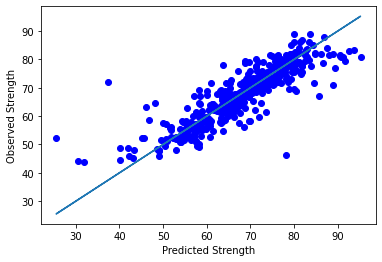

In [135]:
# observed label vs predicted
plt.plot (lrmspt_pred, Y_test, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lrmspt_pred, lrmspt_pred)

In [136]:
print ("Test R2=", round (r2_score (Y_test, lrmspt_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_test, lrmspt_pred))
print ("RMSE=", round (rmse, 2))

Test R2= 0.745
RMSE= 4.7


Like the training set above, the test set also has a R2 of 0.745 and a RMSE of 4.7, which is not as high as other models we have seen so far but a lot better than the second linear regression model.  

## 5-fold Cross Validation 

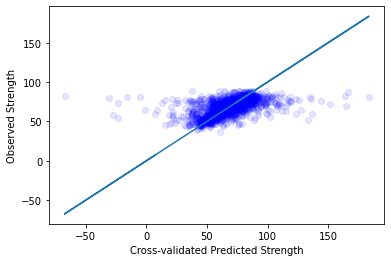

In [137]:
# 5 fold cross validation
#This is for the second model with polynomial features. 
lrmcv = LinearRegression()
Xpolyt = pd.DataFrame (poly.fit_transform (X_train_scaled))
lrm_cv_spoly = cross_val_predict (lrmcv, Xpolyt, Y_train, cv=5)
plt.plot (lrm_cv_spoly, Y_train, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Cross-validated Predicted Strength")
plt.plot (lrm_cv_spoly, lrm_cv_spoly)

In [138]:
print ("CV R2=", round (r2_score (Y_train, lrm_cv_spoly), 4))
cvrmse = np.sqrt (mean_squared_error (Y_train, lrm_cv_spoly))
print ("CV RMSE=", round (cvrmse, 4))

CV R2= -0.9882
CV RMSE= 13.4739


Our cross-validation for the training data shows a R2 of -0.9882 and RMSE of 13.921. R2 is negative instantiating that the is the model fits the data very badly. We are interested to see if this would occur with 2-fold cross validation. 

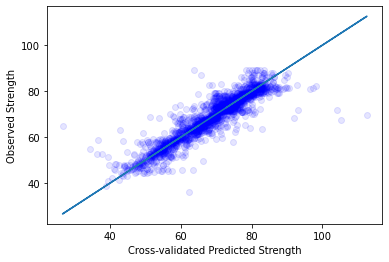

In [139]:
# 2 fold cross validation for train_scaled set
lrmcv2 = LinearRegression()
Xpolyt2 = pd.DataFrame (poly.fit_transform (X_train_scaled))
lrm_cv_spoly2 = cross_val_predict (lrmcv2, Xpolyt2, Y_train, cv=2)
plt.plot (lrm_cv_spoly2, Y_train, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Cross-validated Predicted Strength")
plt.plot (lrm_cv_spoly2, lrm_cv_spoly2)

In [140]:
print ("CV R2=", round (r2_score (Y_train, lrm_cv_spoly2), 4))
cvrmse2 = np.sqrt (mean_squared_error (Y_train, lrm_cv_spoly2))
print ("CV RMSE=", round (cvrmse, 4))

CV R2= 0.8336
CV RMSE= 13.4739


Interestingly with 2 fold cross validation the model performs much better. R2 is 0.8336 and RMSE is 13.47

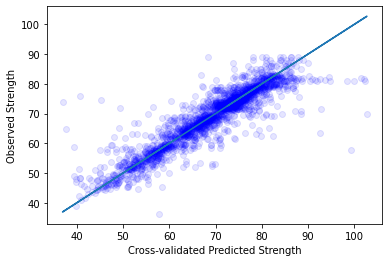

In [141]:
# 5 fold cross validation
#Ridge regression model
lrmcv = Ridge()
Xpolyt = pd.DataFrame (poly.fit_transform (X_train_scaled))
lrm_cv_spoly = cross_val_predict (lrmcv, Xpolyt, Y_train, cv=5)
plt.plot (lrm_cv_spoly, Y_train, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Cross-validated Predicted Strength")
plt.plot (lrm_cv_spoly, lrm_cv_spoly)

In [142]:
print ("CV R2=", round (r2_score (Y_train, lrm_cv_spoly), 4))
cvrmse = np.sqrt (mean_squared_error (Y_train, lrm_cv_spoly))
print ("CV RMSE=", round (cvrmse, 4))

CV R2= 0.8076
CV RMSE= 4.1916


Checking the cross validation for our Ridge regression model we get a R2 of 0.8076 and an RMSE of 4.1916, which are both better than the 5-fold cross validation of the linear regression model.

# Decision Tree

We will now fit our data into a decision tree model. 

## First Model

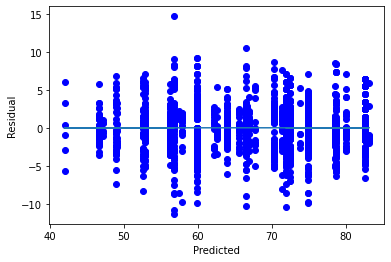

In [143]:
lifedtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
lifedtree.fit (X_train_scaled, Y_train)
lifedtree_pred = lifedtree.predict (X_train_scaled)
lifedtree_resid = Y_train - lifedtree_pred
plt.plot (lifedtree_pred, lifedtree_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (lifedtree_pred, 0*lifedtree_pred)
plt.show()

There is good uniform variance. (There seem to be one outlier)

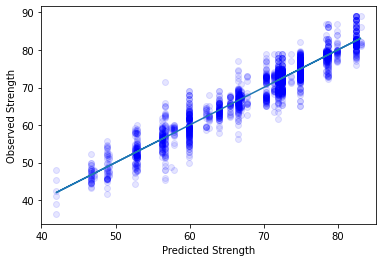

In [144]:
# Observed vs predicted
plt.plot (lifedtree_pred,Y_train, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lifedtree_pred, lifedtree_pred)

In [145]:
print ("Train R2=", round (r2_score (Y_train, lifedtree_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_train, lifedtree_pred))
print ("RMSE=", round (rmse, 3))

Train R2= 0.918
RMSE= 2.739


This decision tree regressor model has a R2 of 0.918 and RMSE of 2.74. This shows that the life expectancy can be explained pretty accurately with our model (91.8%), with very little error. We also have a RMSE of 2.74, which is relatively low showing that the training set is a good predictor of the training predicting variable. We should expect an error of +-3 years

In [146]:
#feature importance score
pd.set_option("display.max_rows", None)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
feature_imp = pd.DataFrame(lifedtree.feature_importances_)
feature_imp.rename (columns={0: "Importance"})
feature_imp.set_index (X_train_scaled.columns)

0
Year                                                0.001566
 BMI                                                0.026755
Total expenditure                                   0.001223
Schooling                                           0.002172
transformed_alcohol                                 0.000000
transformed_GDP                                     0.004782
transformed_population                              0.000000
transformed_thinness_1-19                           0.000000
transformed_thinness_5-9                            0.006169
transformed_adult_mortality                         0.136369
logit_hepb                                          0.000000
logit_polio                                         0.000000
logit_diphtheria                                    0.000000
transformed_income                                  0.182070
transformed_under_five_deaths                       0.006320
transformed_HIV/AIDS                                0.630090
transformed_percentage_expenditure                  0.000000
transformed_Measles                                 0.000000
transformed_infant_deaths                           0.000943
Country_Afghanistan                                 0.000000
Country_Albania                                     0.000000
Country_Algeria                                     0.000000
Country_Angola                                      0.000763
Country_Antigua and Barbuda                         0.000000
Country_Argentina                                   0.000000
Country_Armenia                                     0.000000
Country_Australia                                   0.000000
Country_Austria                                     0.000000
Country_Azerbaijan                                  0.000000
Country_Bahamas                                     0.000000
Country_Bahrain                                     0.000000
Country_Bangladesh                                  0.000000
Country_Barbados                                    0.000000
Country_Belarus                                     0.000000
Country_Belgium                                     0.000000
Country_Belize                                      0.000000
Country_Benin                                       0.000000
Country_Bhutan                                      0.000000
Country_Bolivia (Plurinational State of)            0.000000
Country_Bosnia and Herzegovina                      0.000000
Country_Botswana                                    0.000000
Country_Brazil                                      0.000000
Country_Brunei Darussalam                           0.000000
Country_Bulgaria                                    0.000000
Country_Burkina Faso                                0.000000
Country_Burundi                                     0.000000
Country_Cabo Verde                                  0.000000
Country_Cambodia                                    0.000000
Country_Cameroon                                    0.000000
Country_Canada                                      0.000000
Country_Central African Republic                    0.000000
Country_Chad                                        0.000000
Country_Chile                                       0.000000
Country_China                                       0.000000
Country_Colombia                                    0.000000
Country_Comoros                                     0.000000
Country_Congo                                       0.000000
Country_Cook Islands                                0.000000
Country_Costa Rica                                  0.000000
Country_Croatia                                     0.000000
Country_Cuba                                        0.000000
Country_Cyprus                                      0.000000
Country_Czechia                                     0.000000
Country_Côte d'Ivoire                               0.000000
Country_Democratic People's Republic of Korea       0.000000
Country_Democratic Republic of th

HIV/AIDS, Income Composition, & Adlult mortality have the highest feature importance scores at 0.63, 0.18 & 0.14, respectively 

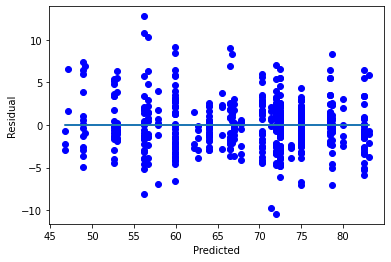

In [147]:
#test set
lifedtreet_pred = lifedtree.predict (X_test_scaled)
lifedtreet_resid = Y_test - lifedtreet_pred
plt.plot (lifedtreet_pred, lifedtreet_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (lifedtreet_pred, 0*lifedtreet_pred)
plt.show()

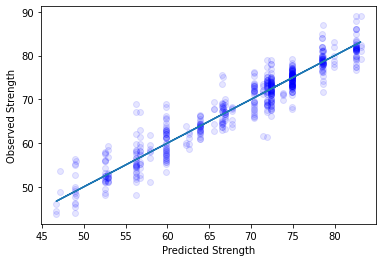

In [148]:
# Observed vs predicted
plt.plot (lifedtreet_pred,Y_test, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lifedtreet_pred, lifedtreet_pred)

In [149]:
print ("Test R2=", round (r2_score (Y_test, lifedtreet_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_test, lifedtreet_pred))
print ("Test=", round (rmse, 3))

Test R2= 0.905
Test= 2.872


This decision tree regressor model for our test set has a R2 of 0.905 and RMSE of 2.872. This is slightly better than our training set model. This shows that the life expectancy can be explained pretty accurately with our model (91%), with very little error.The RMSE shows that the training set is a good predictor of the training predicting variable. We should expect an error of +-3 years

In [150]:
#feature importance score
pd.set_option("display.max_rows", None)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)
feature_imp = pd.DataFrame(lifedtree.feature_importances_)
feature_imp.rename (columns={0: "Importance"})
feature_imp.set_index (X_test_scaled.columns)

0
Year                                                0.001566
 BMI                                                0.026755
Total expenditure                                   0.001223
Schooling                                           0.002172
transformed_alcohol                                 0.000000
transformed_GDP                                     0.004782
transformed_population                              0.000000
transformed_thinness_1-19                           0.000000
transformed_thinness_5-9                            0.006169
transformed_adult_mortality                         0.136369
logit_hepb                                          0.000000
logit_polio                                         0.000000
logit_diphtheria                                    0.000000
transformed_income                                  0.182070
transformed_under_five_deaths                       0.006320
transformed_HIV/AIDS                                0.630090
transformed_percentage_expenditure                  0.000000
transformed_Measles                                 0.000000
transformed_infant_deaths                           0.000943
Country_Afghanistan                                 0.000000
Country_Albania                                     0.000000
Country_Algeria                                     0.000000
Country_Angola                                      0.000763
Country_Antigua and Barbuda                         0.000000
Country_Argentina                                   0.000000
Country_Armenia                                     0.000000
Country_Australia                                   0.000000
Country_Austria                                     0.000000
Country_Azerbaijan                                  0.000000
Country_Bahamas                                     0.000000
Country_Bahrain                                     0.000000
Country_Bangladesh                                  0.000000
Country_Barbados                                    0.000000
Country_Belarus                                     0.000000
Country_Belgium                                     0.000000
Country_Belize                                      0.000000
Country_Benin                                       0.000000
Country_Bhutan                                      0.000000
Country_Bolivia (Plurinational State of)            0.000000
Country_Bosnia and Herzegovina                      0.000000
Country_Botswana                                    0.000000
Country_Brazil                                      0.000000
Country_Brunei Darussalam                           0.000000
Country_Bulgaria                                    0.000000
Country_Burkina Faso                                0.000000
Country_Burundi                                     0.000000
Country_Cabo Verde                                  0.000000
Country_Cambodia                                    0.000000
Country_Cameroon                                    0.000000
Country_Canada                                      0.000000
Country_Central African Republic                    0.000000
Country_Chad                                        0.000000
Country_Chile                                       0.000000
Country_China                                       0.000000
Country_Colombia                                    0.000000
Country_Comoros                                     0.000000
Country_Congo                                       0.000000
Country_Cook Islands                                0.000000
Country_Costa Rica                                  0.000000
Country_Croatia                                     0.000000
Country_Cuba                                        0.000000
Country_Cyprus                                      0.000000
Country_Czechia                                     0.000000
Country_Côte d'Ivoire                               0.000000
Country_Democratic People's Republic of Korea       0.000000
Country_Democratic Republic of th

HIV/AIDS, Income Composition, & Adlult mortality have the highest feature importance scores at 0.63, 0.18 & 0.14, respectively

## Second Model

We will now use gridsearchCV to use a more optimal tree. 

## Grid Search


In [151]:
parameters = {'max_depth':(2, 3, 4, 5, 6, 7, 10, 20, 30), 'min_samples_leaf':(3, 4, 5, 10, 20)}
clf = DecisionTreeRegressor (random_state=42)
clf_gs = GridSearchCV (clf, parameters, scoring='neg_mean_squared_error')
clf_gs.fit (X_train_scaled, Y_train)
gs_results = pd.DataFrame (clf_gs.cv_results_)
print (clf_gs.best_estimator_)
print ("Best parameters:", clf_gs.best_params_)
gs_results

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, random_state=42)
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.013101      0.001708         0.004086        0.000066   
1        0.012167      0.000024         0.004051        0.000017   
2        0.012388      0.000382         0.004290        0.000301   
3        0.012557      0.000484         0.004162        0.000146   
4        0.012126      0.000048         0.004075        0.000023   
5        0.015514      0.000621         0.004213        0.000214   
6        0.015041      0.000059         0.004072        0.000013   
7        0.015060      0.000127         0.004455        0.000815   
8        0.014933      0.000039         0.004049        0.000011   
9        0.016379      0.003047         0.005312        0.002497   
10       0.020854      0.001081         0.004682        0.000338   
11       0.017454      0.000033         0.004027        0.000018   
12       0.017571      0.000101         0.004068        0.000049   
13       0.018127      0.000841         0.004212        0.000333   
14       0.017276      0.000061         0.004018        0.000016   
15       0.019979      0.000014         0.004044        0.000032   
16       0.019948      0.000065         0.004017        0.000014   
17       0.019945      0.000074         0.004044        0.000017   
18       0.019837      0.000080         0.004023        0.000010   
19       0.019508      0.000078         0.004031        0.000023   
20       0.022376      0.000074         0.004031        0.000014   
21       0.023213      0.001381         0.004418        0.000771   
22       0.022297      0.000087         0.004048        0.000036   
23       0.022010      0.000060         0.004029        0.000008   
24       0.021224      0.000131         0.004035        0.000006   
25       0.024726      0.000104         0.004035        0.000010   
26       0.024621      0.000116         0.004042        0.000007   
27       0.024452      0.000065         0.004047        0.000026   
28       0.023718      0.000115         0.004033        0.000007   
29       0.022508      0.000170         0.004060        0.000037   
30       0.030377      0.000140         0.004042        0.000019   
31       0.029655      0.000171         0.004036        0.000010   
32       0.029041      0.000158         0.004045        0.000009   
33       0.029046      0.002536         0.004604        0.001050   
34       0.023912      0.000266         0.004028        0.000011   
35       0.036031      0.000632         0.004057        0.000008   
36       0.033662      0.000430         0.004058        0.000014   
37       0.032115      0.000425         0.004058        0.000011   
38       0.027874      0.000506         0.004183        0.000290   
39       0.023939      0.000246         0.004040        0.000018   
40       0.036227      0.000720         0.004087        0.000032   
41       0.033747      0.000511         0.004078        0.000012   
42       0.032118      0.000417         0.004056        0.000016   
43       0.027657      0.000502         0.004039        0.000011   
44       0.023932      0.000240         0.004032        0.000005   

   param_max_depth param_min_samples_leaf  \
0                2                      3   
1                2                      4   
2                2                      5   
3                2                     10   
4                2                     20   
5                3                      3   
6                3                      4   
7                3                      5   
8                3                     10   
9                3                     20   
10               4                      3   
11               4                      4   
12               4                      5   
13               4                     10   
14               4                     20   
15               5                      3   
16               5                      4   
17               5                      5   
18               5  

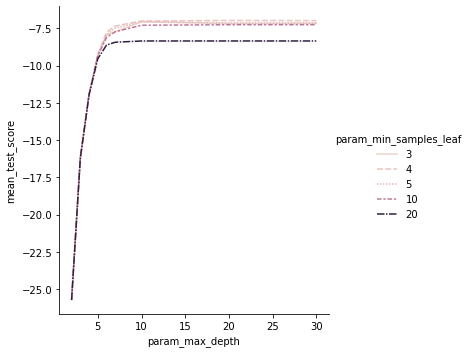

In [152]:
sb.relplot (kind='line', x=gs_results.param_max_depth, y=gs_results.mean_test_score, 
             hue=gs_results.param_min_samples_leaf, style=gs_results.param_min_samples_leaf)
plt.show()

The above graph shows the results for our grid search. From this graph, we can infer that the decision tree model works best at a max depth of around 20. If we look even closely, we can see that the least mean score sits with min_sample_leaf of 4. we will use these values to optimize our decision tree model. 

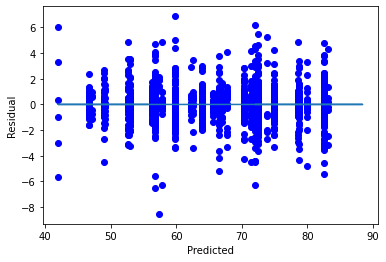

In [153]:
lifedtreeg = DecisionTreeRegressor(max_depth=20, min_samples_leaf=4)
lifedtreeg.fit (X_train_scaled, Y_train)
lifedtreeg_pred = lifedtreeg.predict (X_train_scaled)
lifedtreeg_resid = Y_train - lifedtreeg_pred
plt.plot (lifedtree_pred, lifedtreeg_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (lifedtreeg_pred, 0*lifedtreeg_pred)
plt.show()

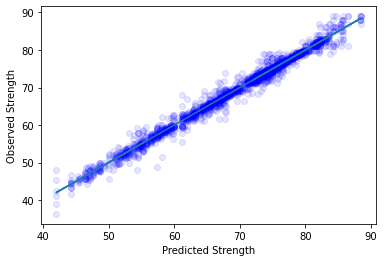

In [154]:
# Observed vs predicted
plt.plot (lifedtreeg_pred,Y_train, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lifedtreeg_pred, lifedtreeg_pred)

In [155]:
print ("Train R2=", round (r2_score (Y_train, lifedtreeg_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_train, lifedtreeg_pred))
print ("RMSE=", round (rmse, 3))

Train R2= 0.985
RMSE= 1.152


The optimized decision tree regressor model has a R2 of 0.985 and RMSE of 1.152. This shows that the life expectancy can be explained very accurately with this model (98.5%), with very little error. The RMSE shows that the predictions are very accurate with a mean error of +- 1.5 years. 

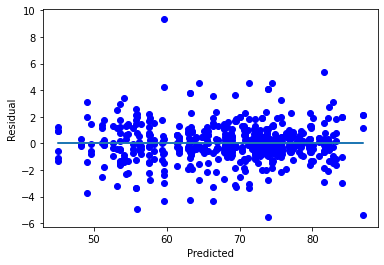

In [156]:
lifedtreeg.fit (X_test_scaled, Y_test)
lifedtreeg_pred = lifedtreeg.predict (X_test_scaled)
lifedtreeg_resid = Y_test - lifedtreeg_pred
plt.plot (lifedtreeg_pred, lifedtreeg_resid, 'bo')
plt.ylabel ("Residual")
plt.xlabel ("Predicted")
plt.plot (lifedtreeg_pred, 0*lifedtreeg_pred)
plt.show()

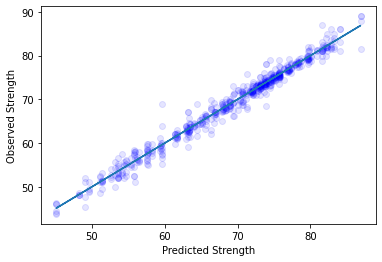

In [157]:
# Observed vs predicted
plt.plot (lifedtreeg_pred,Y_test, 'bo', alpha=0.1)
plt.ylabel ("Observed Strength")
plt.xlabel ("Predicted Strength")
plt.plot (lifedtreeg_pred, lifedtreeg_pred)

In [158]:
print ("Train R2=", round (r2_score (Y_test, lifedtreeg_pred), 3))
rmse = np.sqrt (mean_squared_error (Y_test, lifedtreeg_pred))
print ("RMSE=", round (rmse, 3))

Train R2= 0.978
RMSE= 1.389


The optimized decision tree regressor model for the test set has a R2 of 0.978 and RMSE of 1.389. This shows that the life expectancy can be explained very accurately with our model (97.8%), with very little error. We also have a RMSE of 1.156, which is low showing that the training set is a good predictor of the training predicting variable. We should expect an error of +-1 years

## 5 Fold Cross Validation 

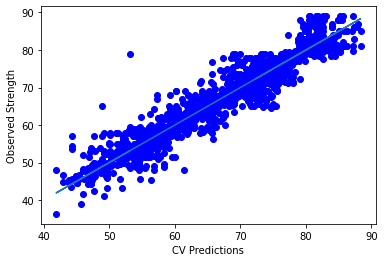

In [159]:
#train
gs_pred_cv = cross_val_predict (lifedtreeg, X_train_scaled, Y_train)
plt.plot (gs_pred_cv, Y_train, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("CV Predictions")
plt.plot (gs_pred_cv, gs_pred_cv)

In [160]:
cv_r2 = cross_val_score (lifedtreeg, X_train_scaled, Y_train, scoring="r2")

In [161]:
cv_rmse = np.sqrt (- cross_val_score (lifedtreeg, X_train_scaled, Y_train, scoring='neg_mean_squared_error'))
print (cv_rmse)
print (np.mean (cv_rmse))

[2.57748013 2.45730242 2.45670458 2.65682417 2.96360535]
2.6223833287589415


In [162]:
print ("CV R2", cv_r2, np.mean (cv_r2))
print ("RMSE", np.sqrt(mean_squared_error (Y_train, gs_pred_cv)))

CV R2 [0.93271493 0.93721603 0.92593273 0.92169347 0.90268833] 0.9240490999439708
RMSE 2.6363154399794455


With 5 fold validation the train set has a R2 of 0.924 and RMSE of 2.64. 

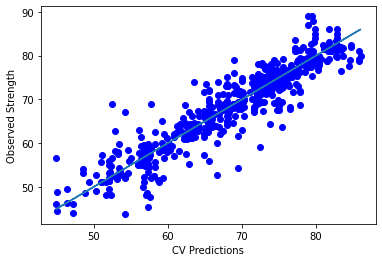

In [163]:
#test
gs_pred_cvt = cross_val_predict (lifedtreeg, X_test_scaled, Y_test)
plt.plot (gs_pred_cvt, Y_test, 'bo')
plt.ylabel ("Observed Strength")
plt.xlabel ("CV Predictions")
plt.plot (gs_pred_cvt, gs_pred_cvt)

In [164]:
cv_r2t = cross_val_score (lifedtreeg, X_test_scaled, Y_test, scoring="r2", cv=5)

In [165]:
cv_rmse2 = np.sqrt (- cross_val_score (lifedtreeg, X_test_scaled, Y_test, scoring='neg_mean_squared_error'))
print (cv_rmse2)
print (np.mean (cv_rmse2))

[3.39225576 3.66956111 3.8443823  3.30692665 3.33961485]
3.510548135129094


In [166]:
print ("CV R2", cv_r2, np.mean (cv_r2t))
print ("RMSE", np.sqrt(mean_squared_error (Y_test, gs_pred_cvt)))

CV R2 [0.93271493 0.93721603 0.92593273 0.92169347 0.90268833] 0.8562078769835049
RMSE 3.508180979265592


With 5 fold validation the test set has a R2 of 0.857 and RMSE of 3.52

# Conclusion and Results


Linear Regression: Our linear regression models seemed like a tale of two halves. The training sets performed extremely well, our best train model had a R2 of 1.00 and RMSE of 0.0. However, the test sets, compared to the train sets, performed relatively poorly. Our best test model was the first model with a R2 of 0.956 and a RMSE of 1.955 followed by our 5 cross validated ridge model 
with a R2 of 0.8076 and a RMSE of 4.1916. 

Decision Tree: Our decision tree models performed better than our linear regression models. All but one test sets had R2 scores above 90% and RMSE values below 3 years. Our best model had a R2 of 0.978 and RMSE of 1.389. 5 fold cross validation for this model had a R2 of 0.857 and RMSE of 3.52. This shows that there is good predictability with this model. 


Results: 
Both our models showed promising results that showing that our models are good predictors of life expectancy. 

To answer our research questions, we can say that the different features present all have an impact on life expectancy so changing any feature will have an effect on the prediction. The largest impact however is HIV/AIDS, which is understandable since there is no cure for the disease. The next largest impact on life expectancy is income, which could be explained as access to healthcare and medicine. 
